<a href="https://colab.research.google.com/github/drtophop/CASAML-Thesis/blob/main/CAS_AML_Thesis_NguyenHop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CAS AML Thesis: Preliminary work for custom object detection and segmentation

Author: Dr. sc. ETH Minh Hop Nguyen

Date: 15.06.2023




Abstract:

Classic production facilities, such as foundries or machine parks, are typically equipped with a large number of machinery and tools to produce goods while minimizing rejects. To optimize the output, the parameters of all production devices form a vast multidimensional parameter set with a significant amount of production data. One aspect of this data stream involves counting the number of goods and rejects, which can be challenging in classical foundries and often requires manual intervention. This preliminary work aims to present a basic implementation for counting good castings and rejects, with the goal of further improvement, understanding, and incorporating additional features in the future.

Since a dataset of castings is not available, the implementation will utilize custom datasets containing car data obtained from [https://www.kaggle.com/](https://www.kaggle.com/)

Remarks:
*   In order to run this notebook, a kaggle acount credential are required
*   This notebook was created [colab.research.google.com/](colab.research.google.com/) and tested there
*   To control the time demand of the trainings, please adjust parameters in the Hyperparameter section
*   The dataset to be downlaoded will require 940MB of diskspace








## Libraries, Modules and Initializations

`Numpy` is a powerful Python library that provides support for large, multi-dimensional arrays and a wide range of mathematical functions for efficient numerical computations and is imported as `pandas`

In [ ]:
import numpy as np

The `pandas` library is imported as `pd` to facilitate data manipulation and analysis tasks.

In [ ]:
import pandas as pd

The `os` module is imported to provide functionalities for interacting with the operating system, while the `time` and `random` modules are imported for time-related operations and generating random numbers, respectively


In [ ]:
import os
import time, random

with `PyTorch` neural networks can be build and trained a more organized and simplified manner

In [ ]:
pip install pytorch-lightning --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 720.6/720.6 kB 31.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.2/519.2 kB 46.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 62.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 kB 15.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 31.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.6/149.6 kB 17.8 MB/s eta 0:00:00


In [ ]:
# Import the main PyTorch library, allowing you to use its functionalities for
# tensor computations and neural network operations.
import torch

# Imports the nn module from PyTorch, which provides classes for defining and
# building neural network architectures
from torch import nn

# These imports the Dataset, DataLoader, and random_split classes from
# the torch.utils.data module, which are useful for handling datasets and
# creating data loaders for training and validation.
from torch.utils.data import Dataset, DataLoader, random_split


# Imports the F module from PyTorch, which contains various functional
# operations commonly used in neural networks, such as activation functions.
from torch.functional import F


# These import the transforms module from torchvision, which provides common
# image transformations and in addition specific transformations: ToTensor,
# Resize, and ToPILImage.
from torchvision import transforms
from torchvision.transforms import ToTensor, Resize, ToPILImage

# pytorch_lightning library as pl is a lightweight PyTorch wrapper for
# high-level training and research purposes.
import pytorch_lightning as pl

# the train_test_split function from the sklearn.model_selection module can be
# used to split a dataset into training and validation sets.
from sklearn.model_selection import train_test_split

# checks if a CUDA-enabled GPU is available and prints True if it is
print(torch.cuda.is_available())

True


Displaying and managing output in an `IPython` environment and working with file paths

In [ ]:
from IPython import display
from IPython.display import clear_output
from pathlib import Path

Modules for working with images and displaying plots and for for image I/O operations

In [ ]:

# imports the pyplot module from Matplotlib as plt for creating and displaying
# plots
import matplotlib.pyplot as plt

# imports functions for reading and manipulating image files as mpimg
import matplotlib.image as mpimg

# imports the io module from the scikit-image library, which provides functions
# for reading and saving various image formats
import skimage.io

# v3 module from the imageio library, which is a versatile library for reading
# and writing a wide range of image and video formats
import imageio.v3 as iio

# This imports the Image class from the PIL (Python Imaging Library) library,
# for opening, manipulating, and saving many different image file formats
from PIL import Image


Modules for working with YAML files, file globbing, input/output operations, image processing using OpenCV, and JSON file handling

In [ ]:

# yaml module provides functions for working with YAML (YAML Ain't Markup
# Language) files
import yaml

# glob module provides functions for file globbing, allowing to search for files
# using wildcard patterns in a specified directory
import glob

# io module offers functionalities to create, read, and write data to and from
# input/output streams.
import io

# cv2 module from OpenCV (Open Source Computer Vision Library) is a popular
# library for computer vision and image processing tasks
import cv2

# json module, which provides functions for working with JSON (JavaScript
# Object Notation) data.
import json

In [ ]:
# shutil module, which provides functions for high-level file operations, such
# as copying, moving, and deleting files and directories
import shutil

# The tqdm library is used for creating progress bars in loops and iterable
# processes.
from tqdm import tqdm

`Albumentations` library imported as `A`, which is a popular library for image augmentation in computer vision tasks. Also imported is the  ToTensorV2` class from the `lbumentations.pytorch.transforms` module, which provides a transformation to convert images to tensors compatible with PyTorch.

In [ ]:
import albumentations as A
from albumentations.pytorch.transforms import ToTensorV2

#### Opendatasets

The opendatasets Python package, provides a convenient way to download and work with open datasets from various sources

In [ ]:
!pip install opendatasets --quiet

In [ ]:
import opendatasets as od

#### Initital Folders

this imports modules for displaying HTML content and setting up a local folder path, retrieves a Python script from a URL, and uses a helper function to set the data path based on the runtime environment (Colab or local).

In [ ]:
from IPython.display import HTML, display


# set path containing data folder or use default for Colab (/gdrive/My Drive)
local_folder = '/gdrive/My Drive/Colab Notebooks/Thesis';


import urllib.request
urllib.request.urlretrieve('https://raw.githubusercontent.com/guiwitz/MLCV/main/notebooks/check_colab.py', 'check_colab.py')
from check_colab import set_datapath
colab, datapath = set_datapath(local_folder)



Mounted at /gdrive


##### Local Folders

Retrieves the current working directory as `path_main`

In [ ]:
path_main = os.getcwd()

Prepare the String for the detection dataset folder

In [ ]:
path_yoloset = f'{path_main}/car-object-detection/data'

##### Clear folders

Before starting with the notebook, existing contents and existing folders from a potentional former execution of this Notebook will be cleared to show proper execution, by following code snippet

In [ ]:
dirs_to_delete = ['car-object-detection', 'yolov5', 'test', 'tmp', 'train', 'valid', 'yolov5_train']

for dir_to_delete in dirs_to_delete:
    path_del = os.path.join(path_main, dir_to_delete)
    if os.path.exists(path_del):
        shutil.rmtree(path_del)

files_to_delete = ['data.yaml','yolov5m6.pt']

for file_to_delete in files_to_delete:
    file_del = os.path.join(path_main, file_to_delete)
    if os.path.exists(file_del):
        os.remove(file_del)


dirs_to_delete = ['carvana-image-masking-png']

for dir_to_delete in dirs_to_delete:
    path_del = os.path.join(path_main, dir_to_delete)
    if os.path.exists(path_del):
        shutil.rmtree(path_del)

## Datasets

In Order to train Object recognition and Object segmentation, Datasets will be downloaded from [https://www.kaggle.com/](https://www.kaggle.com/).

### Object Recognition

The dataset contains media of cars in all views

Kaggle, 2023. Car Object Detection
Data set. Retrieved from https://www.kaggle.com/datasets/sshikamaru/car-object-detection

In [ ]:
od.download('https://www.kaggle.com/datasets/sshikamaru/car-object-detection/download?datasetVersionNumber=2')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: drtophop
Your Kaggle Key: ··········


100%|██████████| 112M/112M [00:08<00:00, 14.2MB/s]


### Object Segmentation

The Carvana Dataset, provided for the competition consisted of 8,025 training images, each with a corresponding manually segmented mask indicating the car pixels. The challenge was to train a model that could accurately generate the car segmentation masks for a separate test set of images


Kaggle, 2023. Carvana Image Masking (PNG)
Data set. Retrieved from https://www.kaggle.com/datasets/ipythonx/carvana-image-masking-png

In [18]:
od.download('https://www.kaggle.com/datasets/ipythonx/carvana-image-masking-png/download?datasetVersionNumber=1')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username:Your Kaggle Key:Downloading carvana-image-masking-png.zip to ./carvana-image-masking-png


100%|██████████| 828M/828M [00:57<00:00, 15.0MB/s]


### Hyperparameters

For convience, the setting of parametes will be provided here to control the execution and the training of the object detection and segmentation. These parameters are also mainly responsible duration of execution of this notebook

Parameters for Training Object Detection with Yolo V5

In [19]:
# Project Folder setup for training
PROJECT_NAME = "yolov5_train"

# Pretrained Base-Model, on which custom training will be applied
BASE_MODEL = "yolov5m6.pt"

# Number trainig batches
TRAIN_BATCH = 32

# Number of training epochs
TRAIN_EPOCHS = 200

# Number of valitation batches
VAL_BATCH = 64

Parameters for Training Object Segmentation with a Unet Model

In [20]:
# Resizing the images and labels of the carvana data set, with are origninally
# 1280x1918

image_height = 160*3
image_width = 240*3

# Number trainig batches
batch_size = 16

# Number of training epochs
num_epochs = 151  # Ad

## Yolov5 Object Recoginition

YOLOv5 is an object detection model that belongs to the YOLO (You Only Look Once) family, known for its real-time and high-performance capabilities in detecting objects in images and videos.


In this thesis yolov5 will be trained with custom data, therefore implementation follows the tutorial by Kav, M. (n.d.). YOLOv5 Tutorial: Train with Custom Data. Kaggle. Retrieved June 1st, 2023, from [https://www.kaggle.com/code/maxkav/yolov5-tutorial-train-with-custom-data](https://www.kaggle.com/code/maxkav/yolov5-tutorial-train-with-custom-data)

### Clone and Setup Yolo V5

In [21]:
# Clone yolov5 from the corresponding Git Repository to Local
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 15965, done.
remote: Counting objects: 100% (134/134), done.
remote: Compressing objects: 100% (74/74), done.
remote: Total 15965 (delta 80), reused 93 (delta 60), pack-reused 15831
Receiving objects: 100% (15965/15965), 14.56 MiB | 19.06 MiB/s, done.
Resolving deltas: 100% (10954/10954), done.


In [22]:
# Install the required Python packages specified in the requirements.txt file within the yolov5 directory
!pip install -qr yolov5/requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 599.6/599.6 kB 54.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.8 MB/s eta 0:00:00


### Building the Labels for Yolo v5 Application

Doublecheck if needed Folders are ok

In [23]:
print(f'does path_main exist: {os.path.exists(path_main)}')
print(f'does path_yoloset exist: {os.path.exists(path_yoloset)}')

does path_main exist: True
does path_yoloset exist: True


The Labels of the dataset are delivered by the `train_solution_bounding_boxes (1).csv-file`, in which each consists the box parameters as well as the corresponing image. There is only one class: 0, since we detect cars. Following code creates a data frame `df`  for the .csv-file

In [24]:
# Assigns the values 380, 676, and 3 to the variables img_h, img_w, and
# num_channels
img_h, img_w, num_channels = (380, 676, 3)

# Read the .csv-file
df = pd.read_csv(f'{path_yoloset}/train_solution_bounding_boxes (1).csv')

# Rename the column 'image' to 'image_id' in the DataFrame.
df.rename(columns={'image':'image_id'}, inplace=True)

# Remove the file extension from the 'image_id' column values by splitting on
# the '.' character and keeping the first part
df['image_id'] = df['image_id'].apply(lambda x: x.split('.')[0])

# Box Center Calculation by min and max values of Box in x- and y-direction
df['x_center'] = (df['xmin'] + df['xmax'])/2
df['y_center'] = (df['ymin'] + df['ymax'])/2

# ... as well as the with
df['w'] = df['xmax'] - df['xmin']
df['h'] = df['ymax'] - df['ymin']

# set classes to 0
df['classes'] = 0

# Nornalization by image dimendsions
df['x_center'] = df['x_center']/img_w
df['w'] = df['w']/img_w
df['y_center'] = df['y_center']/img_h
df['h'] = df['h']/img_h

# Displaying the first few rows of the dataframe
df.head()


image_id        xmin        ymin        xmax        ymax  x_center  \
0   vid_4_1000  281.259045  187.035071  327.727931  223.225547  0.450434   
1  vid_4_10000   15.163531  187.035071  120.329957  236.430180  0.100217   
2  vid_4_10040  239.192475  176.764801  361.968162  236.430180  0.444645   
3  vid_4_10020  496.483358  172.363256  630.020260  231.539575  0.833213   
4  vid_4_10060   16.630970  186.546010  132.558611  238.386422  0.110347   

   y_center         w         h  classes  
0  0.539817  0.068741  0.095238        0  
1  0.557191  0.155572  0.129987        0  
2  0.543678  0.181621  0.157014        0  
3  0.531451  0.197540  0.155727        0  
4  0.559122  0.171491  0.136422        0

#### Get a first look on the Dataset

Selecting a random image ID from the unique values in the `image_id column` of the DataFrame, reading with `cv` and assign to variable `img`

In [25]:
index = list(set(df.image_id))
image = random.choice(index)
print("Image ID: %s"%(image))

img = cv2.imread(f'{path_yoloset}/training_images/{image}.jpg')
img.shape

Image ID: vid_4_16160


(380, 676, 3)

Reading an image using OpenCV (`cv2.imread`) from the specified file path `({path_yoloset}/training_images/{image}.jpg)`. Then, it displays the image using Matplotlib (`plt.imshow`) after converting the color space from BGR to RGB (c`v2.COLOR_BGR2RGB`)

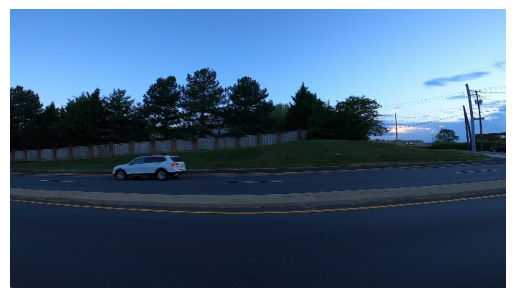

In [26]:
img = cv2.imread(f'{path_yoloset}/training_images/{image}.jpg')

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

### Setting up the labels and images for Yolov5

Yolov5 assumes a certain folder stucture as well as `.txt` files for labels  relative to its project folder. The folowing performs these operations for each image in the DataFrame and creates separate label files and copies the corresponding images to the `tmp` directory for further processing.

In [27]:
source = 'training_images'

for name, mini in tqdm(df.groupby('image_id')):
    if not os.path.exists(os.path.join(path_main, 'tmp', 'labels')):
        os.makedirs(os.path.join(path_main, 'tmp', 'labels'))

    with open(os.path.join(path_main, 'tmp', 'labels', '{}.txt'.format(name)), 'w+') as f:
        row = mini[['classes', 'x_center', 'y_center', 'w', 'h']].astype(float).values
        row = row.astype(str)
        for j in range(len(row)):
            text = ' '.join(row[j])
            f.write(text)
            f.write("\n")

    if not os.path.exists(os.path.join(path_main, 'tmp', 'images')):
        os.makedirs(os.path.join(path_main, 'tmp', 'images'))

    shutil.copy(
        os.path.join(path_yoloset, source, '{}.jpg'.format(name)),
        os.path.join(path_main, 'tmp', 'images', '{}.jpg'.format(name)))

100%|██████████| 355/355 [00:00<00:00, 879.91it/s]


The folders have been created and their foldersnames now get assign to variables `IMAGES_PATH` and `LABELS_PATH`

In [28]:
IMAGES_PATH = f'{path_main}/tmp/images/'
LABELS_PATH = f'{path_main}/tmp/labels/'
os.path.exists(IMAGES_PATH)

True

The list of labels from the specified `LABELS_PATH` directory is build by using `os.listdir`.

Then, it splits the list of labels into three sets: train and test. The train set is obtained by randomly selecting 85% of the labels using train_test_split with a test_size of 0.15.

Next, the remaining 15% of labels are further split into the valid and test sets, with a test size of 0.2 (20% of the remaining labels).

Finally, the code prints the number of labels in each set, displaying the lengths of the `train`, `valid`, and `test` sets.

In [29]:
# Read labels
labels = os.listdir(LABELS_PATH)


# Split data
train, test = train_test_split(labels, test_size=0.15, shuffle=True)
valid, test = train_test_split(test, test_size=0.2)

print(f"train: {len(train)}; valid: {len(valid)}; test: {len(test)}")

train: 301; valid: 43; test: 11


The certain folder stucture for images and labels in test, train and valid folders is set up.

In [30]:
os.makedirs(f'{path_main}/test/images')
os.makedirs(f'{path_main}/test/labels')
os.makedirs(f'{path_main}/train/images')
os.makedirs(f'{path_main}/train/labels')
os.makedirs(f'{path_main}/valid/images')
os.makedirs(f'{path_main}/valid/labels')

The `train`, `valid`, and `test` sets are moved to the folder structre

In [31]:
# Function to move files to directory
def move_files_to_dir(files, dirname):
    # Create target directories if they don't exist
    os.makedirs(f'{path_main}/{dirname}/images', exist_ok=True)
    os.makedirs(f'{path_main}/{dirname}/labels', exist_ok=True)

    for label_filename in files:
        image_filename = f'{label_filename[:-4]}.jpg'
        shutil.copy(f'{IMAGES_PATH}/{image_filename}', f'{path_main}/{dirname}/images/{image_filename}')
        shutil.copy(f'{LABELS_PATH}/{label_filename}', f'{path_main}/{dirname}/labels/{label_filename}')


# Move splits to folders
move_files_to_dir(train, 'train')
move_files_to_dir(test, 'test')
move_files_to_dir(valid, 'valid')


Lets check if the folders contain the right amount of files

In [32]:
directories = ['train', 'test', 'valid']
subdirectories = ['images', 'labels']

for directory in directories:
    for subdirectory in subdirectories:
        path = os.path.join(path_main, directory, subdirectory)
        file_count = len(os.listdir(path))
        print(f'Number of files in {path}: {file_count}')

Number of files in /content/train/images: 301
Number of files in /content/train/labels: 301
Number of files in /content/test/images: 11
Number of files in /content/test/labels: 11
Number of files in /content/valid/images: 43
Number of files in /content/valid/labels: 43


#### Setting up the YAML file

Lets save the pathes of the required folder structure

In [33]:
train_path = f'{path_main}/train'
test_path = f'{path_main}/test'
valid_path  = f'{path_main}/valid'

test_path

'/content/test'

Now create '"data.yaml"' file, that contains the dataset configuration information in YAML format to rund Yolo v5

In [34]:
print(
    f'train: {train_path}\n'
    f'test: {test_path}\n'
    f'val: {valid_path}\n'
    f'nc: {1}\n'
    f'names: HopCar',
)

with open('data.yaml', 'w') as file:
    yaml.dump({
        'train': train_path,
        'test': test_path,
        'val': valid_path,
        'nc': 1,
        'names': {0: 'HopCar'}
    }, file)

train: /content/train
test: /content/test
val: /content/valid
nc: 1
names: HopCar


### Training Yolo v5

In [35]:
# Delete old results if exists
wildcard = f'{PROJECT_NAME}/feature_extraction*'
! rm -r $wildcard

rm: cannot remove 'yolov5_train/feature_extraction*': No such file or directory


Now the `train.py` script from the yolo v5 project can be executed with the specified command-line arguments. Arguments:

- `--batch $TRAIN_BATCH`: Specifies the batch size for training.
- `--epochs $TRAIN_EPOCHS`: Specifies the number of training epochs.
- `--data "data.yaml"`: Specifies the path to the data configuration file in YAML format.
- `--weights $BASE_MODEL`: Specifies the path to the base model weights file.
- `--project $PROJECT_NAME`: Specifies the project name.
- `--name 'feature_extraction'`: Specifies the experiment name.
- `--cache`: Enables caching of images for faster training.
- `--freeze 12`: Freezes the first 12 layers of the model during training.

The yolov5 training process will be initiated with the specified settings, using the provided data configuration, base model weights, and project information.

In [36]:
!python yolov5/train.py --batch $TRAIN_BATCH --epochs $TRAIN_EPOCHS --data "data.yaml" --weights $BASE_MODEL --project $PROJECT_NAME --name 'feature_extraction' --cache --freeze 12

train: weights=yolov5m6.pt, cfg=, data=data.yaml, hyp=yolov5/data/hyps/hyp.scratch-low.yaml, epochs=200, batch_size=32, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=yolov5_train, name=feature_extraction, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[12], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-180-g9bb50b4 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015

In [37]:
# Delete old results
wildcard = f'{PROJECT_NAME}/validation_on_test_data*'
! rm -r $wildcard

rm: cannot remove 'yolov5_train/validation_on_test_data*': No such file or directory


The variable `WEIGHTS_BEST` is the path to the best-performing weights file obtained from the previous training process. Executing the `val.py` script from the yolov5 project with the specified command-line arguments for validation on the test data:

- `--weights $WEIGHTS_BEST`: Specifies the path to the best weights file obtained from training.
- `--batch $VAL_BATCH`: Specifies the batch size for validation.
- `--data 'data.yaml'`: Specifies the path to the data configuration file in YAML format.
- `--task test`: Specifies that the validation is performed on the test data.
- `--project $PROJECT_NAME`: Specifies the project name.
- `--name 'validation_on_test_data'`: Specifies the experiment name for the validation process.
- `--augment`: Enables data augmentation during validation.

The yolov5 model will be evaluated on the test data using the best weights obtained from training. The validation results will be saved under the project and experiment names specified. Data augmentation techniques will be applied during the validation process.

In [38]:
WEIGHTS_BEST = f"{PROJECT_NAME}/feature_extraction/weights/best.pt"
! python yolov5/val.py --weights $WEIGHTS_BEST --batch $VAL_BATCH --data 'data.yaml' --task test --project $PROJECT_NAME --name 'validation_on_test_data' --augment

val: data=data.yaml, weights=['yolov5_train/feature_extraction/weights/best.pt'], batch_size=64, imgsz=640, conf_thres=0.001, iou_thres=0.6, max_det=300, task=test, device=, workers=8, single_cls=False, augment=True, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=yolov5_train, name=validation_on_test_data, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v7.0-180-g9bb50b4 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 276 layers, 35248920 parameters, 0 gradients, 48.9 GFLOPs
test: Scanning /content/test/labels... 11 images, 0 backgrounds, 0 corrupt: 100% 11/11 [00:00<00:00, 763.05it/s]
test: New cache created: /content/test/labels.cache
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 1/1 [00:00<00:00,  1.08it/s]
                   all         11         13      0.995          1      0.995      0.658
Speed: 0.2ms pre-process, 41.8ms inference, 9.4ms N

In [39]:
# Delete old results
wildcard = f"{PROJECT_NAME}/detect_test*"
! rm -r $wildcard

rm: cannot remove 'yolov5_train/detect_test*': No such file or directory


### Analysis of Training

the Yolo v5 project also provides results and diagramms to the training, which is very conveniant

1. F1 Curve: The F1 curve is a graphical representation of the F1 score, which is a measure that combines precision and recall into a single metric, commonly used in binary classification tasks. The curve shows the F1 score at different threshold values, allowing for analysis of the trade-off between precision and recall.

2. Precision-Recall (PR) Curve: The precision-recall curve illustrates the trade-off between precision and recall for different classification thresholds. It is particularly useful when dealing with imbalanced datasets, providing insights into the model's ability to correctly classify positive samples while minimizing false positives.

3. Recall (R) Curve: The recall curve displays the recall (also known as sensitivity or true positive rate) at different classification thresholds. It showcases the model's ability to identify positive samples correctly, providing a comprehensive view of its performance across different threshold values.


In [40]:
pics = ['F1_curve.png', 'PR_curve.png', 'R_curve.png']

fig, axs = plt.subplots(1, 3,figsize=(12, 5))

for i, pic in enumerate(pics):
    image_path = f'{PROJECT_NAME}/feature_extraction/{pic}'
    img = mpimg.imread(image_path)
    axs[i].imshow(img)
    axs[i].axis('off')
    axs[i].set_title(pic[:-4].replace("_", " ").upper())

plt.tight_layout()
plt.show()


Some more Plots, Confusion matrix is not very informative since we only have one class. The Distribution of the Label parameters could be used to optimize Camera position. Finally we have the Training curves over the Epochs, which shows loss and precision diagramms. These can be used to optimize the training parametes such as the amount of epochs.

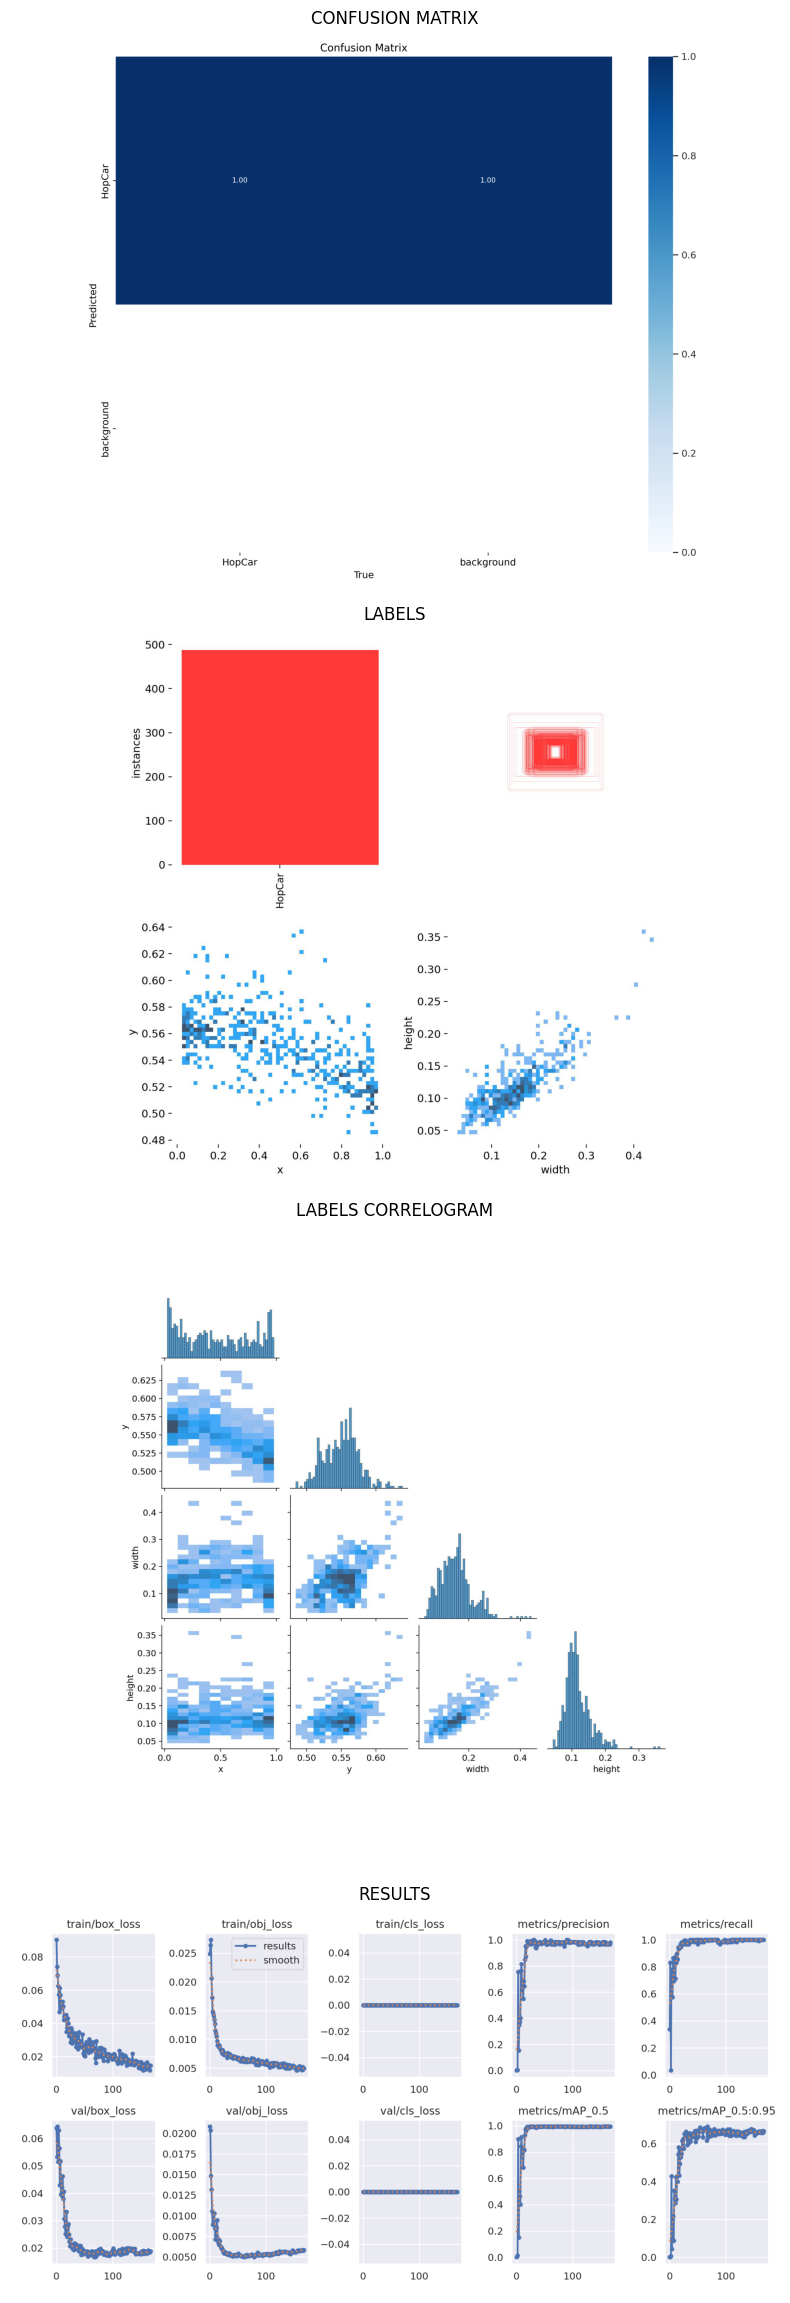

In [41]:
pics = ['confusion_matrix.png', 'labels.jpg', 'labels_correlogram.jpg', 'results.png']

fig, axs = plt.subplots(4, 1, figsize=(8, 24))  # Adjust figsize as desired

for i, pic in enumerate(pics):
    image_path = f'{PROJECT_NAME}/feature_extraction/{pic}'
    img = mpimg.imread(image_path)
    axs[i].imshow(img)
    axs[i].axis('off')
    axs[i].set_title(pic[:-4].replace("_", " ").upper())

plt.tight_layout()
plt.show()

Lets have a visual comparison between Label and Predictd Object detection boxes

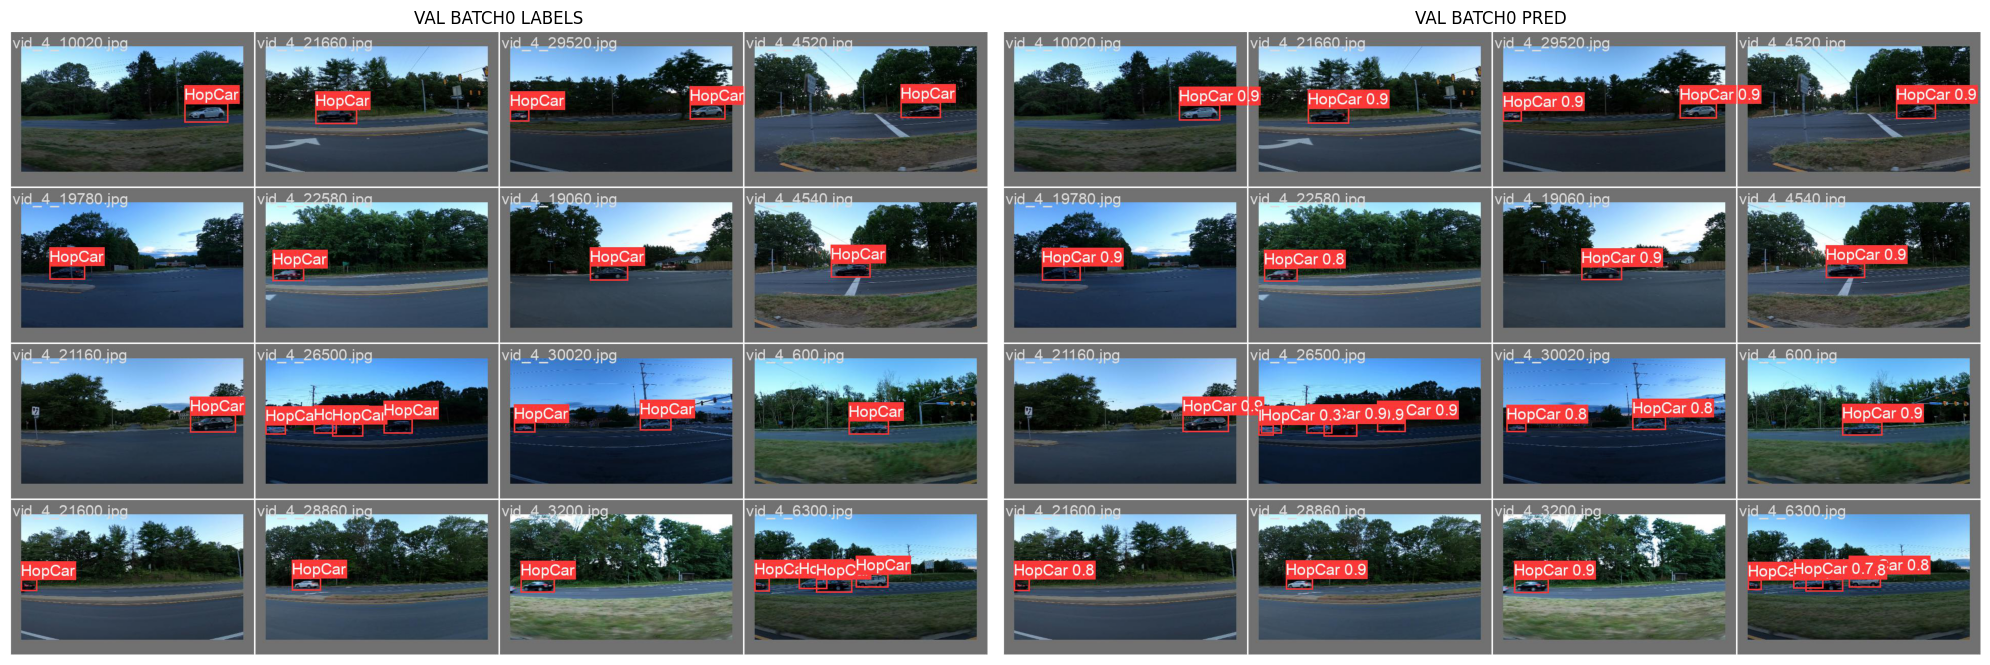

In [42]:
pics = ['val_batch0_labels.jpg', 'val_batch0_pred.jpg']

fig, axs = plt.subplots(1, 2, figsize=(20, 10))  # Adjust figsize as desired

for i, pic in enumerate(pics):
    image_path = f'{PROJECT_NAME}/feature_extraction/{pic}'
    img = mpimg.imread(image_path)
    axs[i].imshow(img)
    axs[i].axis('off')
    axs[i].set_title(pic[:-4].replace("_", " ").upper())

plt.tight_layout()
plt.show()

### Object Detection and Image Cropping

In this section the Object Detection shall be appiled, the images cropped and saved in order to apply Object segmentation later on.

 The detect.py script from the yolov5 project with the specified command-line arguments for object detection images and saves the them in a specific detect folder. Arguments:



- `--weights $WEIGHTS_BEST`: Specifies the path to the best weights file obtained from training.
- `--conf 0.6`: Sets the confidence threshold for object detection to 0.6, meaning detected objects with a confidence score below this threshold will be filtered out.
- `--source '/content/tmp/images'`: Specifies the path to the directory containing the test images.
- `--project $PROJECT_NAME`: Specifies the project name.
- `--name 'detect_test'`: Specifies the experiment name for the detection process.
- `--augment`: Enables data augmentation during object detection.
- `--line=3`: Specifies the line thickness for bounding box visualization.
- `--save-txt`: Saves the predicted bounding box coordinates as text files.

The yolov5 model will perform object detection on the test images using the specified weights. Detected objects above the confidence threshold will be visualized with bounding boxes, and the predicted bounding box coordinates will be saved as text files.

In [43]:
!python yolov5/detect.py --weights $WEIGHTS_BEST --conf 0.6 --source '/content/tmp/images' --project $PROJECT_NAME --name 'detect_test' --augment --line=3 --save-txt

detect: weights=['yolov5_train/feature_extraction/weights/best.pt'], source=/content/tmp/images, data=yolov5/data/coco128.yaml, imgsz=[640, 640], conf_thres=0.6, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=True, visualize=False, update=False, project=yolov5_train, name=detect_test, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-180-g9bb50b4 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 276 layers, 35248920 parameters, 0 gradients, 48.9 GFLOPs
image 1/355 /content/tmp/images/vid_4_1000.jpg: 384x640 1 HopCar, 225.4ms
image 2/355 /content/tmp/images/vid_4_10000.jpg: 384x640 1 HopCar, 58.3ms
image 3/355 /content/tmp/images/vid_4_10020.jpg: 384x640 1 HopCar, 58.1ms
image 4/355 /content/tmp/images/vid_4_10040.jpg: 384x640 1 HopCar, 43.1ms
image 5/355 /conten

Lets have a look at some detections

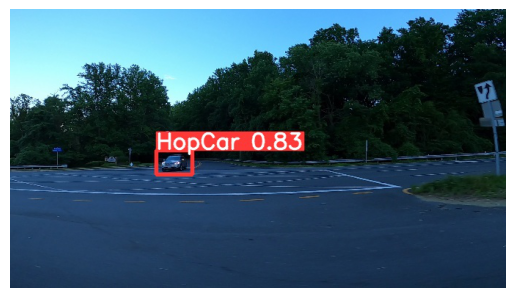

In [44]:
directory = 'yolov5_train/detect_test'
jpg_files = [file for file in os.listdir(directory) if file.endswith('.jpg')]
random_files = random.sample(jpg_files, 3)

for file in random_files:
    image_path = os.path.join(directory, file)
    image = mpimg.imread(image_path)
    plt.imshow(image)
    plt.axis('off')
    plt.show()

The images can now be cropped according to the corresponding bounding boxes

In [45]:
# Path to the output folder for cropped images
output_folder = 'cropped_images'
os.makedirs(output_folder, exist_ok=True)

# Path to the directory containing the labeled and image images
label_folder = 'yolov5_train/detect_test/labels'
image_folder = f'{path_main}/tmp/images'


# Process each labeled image
for label_file in os.listdir(label_folder):
    image_name = label_file[:-4] + '.jpg'
    image_path = os.path.join(image_folder, image_name)
    label_path = os.path.join(label_folder, label_file)
    image = cv2.imread(image_path)
    height, width, _ = image.shape

    # Read the label file
    with open(label_path, "r") as file:
        lines = file.readlines()

    # Process each line in the label file
    for line in lines:
        class_id, x_center, y_center, box_width, box_height = map(float, line.strip().split())

        # Calculate bounding box coordinates
        x_min = int((x_center - box_width / 2) * width)
        y_min = int((y_center - box_height / 2) * height)
        x_max = int((x_center + box_width / 2) * width)
        y_max = int((y_center + box_height / 2) * height)

        # Crop and save the image using the bounding box coordinates
        cropped_img = image[y_min:y_max, x_min:x_max]
        cropped_img_name = f'{image_name[:-4]}_{int(class_id)}.jpg'
        cropped_img_path = os.path.join(output_folder, cropped_img_name)
        cv2.imwrite(cropped_img_path, cropped_img)

Lets have a Look on this cropped images

In [46]:
# Path to the directory containing the original images
image_folder = 'yolov5_train/detect_test'

# Path to the directory containing the cropped images
output_folder = 'cropped_images'

# Randomly select 5 image pairs
image_files = os.listdir(image_folder)
random_images = random.sample(image_files, 5)


desired_width = image_width
desired_height = image_height

# Create a figure to display the image pairs
fig, axs = plt.subplots(5, 2, figsize=(10, 20))  # Update to 2 columns

# Process each randomly selected image pair
for i, image_file in enumerate(random_images):
    image_path = os.path.join(image_folder, image_file)
    cropped_image_name = image_file[:-4] + "_0.jpg"
    cropped_image_path = os.path.join(output_folder, cropped_image_name)

    # Load the original image
    original_image = Image.open(image_path)
    original_image = Resize((desired_width, desired_height))(original_image)

    # Display the original image and cropped image if it exists
    axs[i, 0].imshow(original_image)
    axs[i, 0].axis("off")
    axs[i, 0].set_title("Original Image")

    if os.path.exists(cropped_image_path):
        cropped_image = Image.open(cropped_image_path)
        cropped_image = Resize((desired_width, desired_height))(cropped_image)
        axs[i, 1].imshow(cropped_image)
        axs[i, 1].axis("off")
        axs[i, 1].set_title("Cropped Image")
    else:
        axs[i, 1].axis("off")
        axs[i, 1].set_title("Cropped Image (Not Found)")

# Remove empty subplots if the number of random images is less than 3
for j in range(len(random_images), 3):
    axs[j, 0].axis("off")
    axs[j, 1].axis("off")

# Adjust the spacing between subplots
plt.tight_layout()

# Show the figure
plt.show()

Detecting the objects and cropping the images according to the detection boxes of a custom dataset has been done, lets try to segment the cropped images

## Unet Object Segmentation



The [Carvana Dataset](https://www.kaggle.com/competitions/carvana-image-masking-challenge/overview/description), provided for the competition consisted of 8,025 training images, each with a corresponding manually segmented mask indicating the car pixels. The challenge was to train a model that could accurately generate the car segmentation masks for a separate test set of images


The IoU metric was used to evaluate how well the predicted masks aligned with the ground truth masks.  the Intersection over Union (IoU)metric also known as the Jaccard Index, for binary segmentation masks


### Preperation and Analysis of the Segmentation dataset

Check the pathes dowloaded Carvana dataset

In [47]:
im_path = f'{path_main}/carvana-image-masking-png/train_images'
lab_path = f'{path_main}/carvana-image-masking-png/train_masks'

print(f'does im exist: {os.path.exists(im_path)}')
print(f'does lab_path exist: {os.path.exists(lab_path)}')

does im exist: True
does lab_path exist: True


Using the Path Module to join the pathes

In [48]:
images_path = datapath.joinpath(im_path)
labels_path = datapath.joinpath(lab_path)

The Image files will be sorted based on their names withing its folder

In [49]:
images_files = os.listdir(images_path)
images_files_sorted = sorted(images_files)

And renamed in to image_nr.jpg for easier handling

In [50]:
# iterate over the sorted list and rename each file with an index-based name
for i, file in enumerate(images_files_sorted):
    # generate the new name with an index based on the current position in the sorted list
    new_name = f"image_{i}.jpg"
    # use the os.rename() function to rename the file
    os.rename(os.path.join(images_path, file), os.path.join(images_path, new_name))

The Labels files will be sorted based on their names withing its folder

In [51]:
labels_files = os.listdir(labels_path)
labels_files_sorted = sorted(labels_files)

And renames in to label_nr.jpg for easier handling

In [52]:
# iterate over the sorted list and rename each file with an index-based name
for i, file in enumerate(labels_files_sorted):
    # generate the new name with an index based on the current position in the sorted list
    new_name = f"label_{i}.jpg"
    # use the os.rename() function to rename the file
    os.rename(os.path.join(labels_path, file), os.path.join(labels_path, new_name))

Lets have a first look the images and labels

In [53]:
fig, ax = plt.subplots(2,2)
ax[0,0].imshow(skimage.io.imread(images_path.joinpath('image_20.jpg')))
ax[0,1].imshow(skimage.io.imread(images_path.joinpath('image_4.jpg')))
ax[1,0].imshow(skimage.io.imread(labels_path.joinpath('label_20.jpg')))
ax[1,1].imshow(skimage.io.imread(labels_path.joinpath('label_4.jpg')))


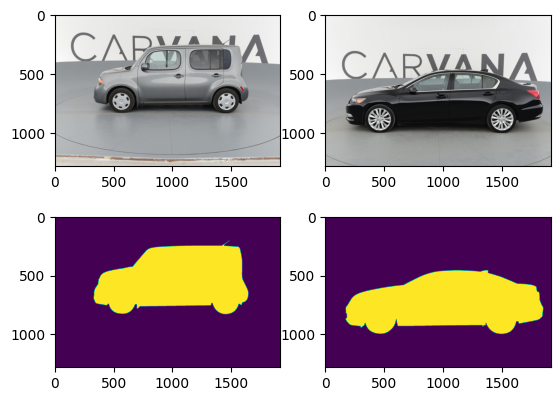

In [54]:
fig, ax = plt.subplots(2,2)
ax[0,0].imshow(skimage.io.imread(images_path.joinpath('image_20.jpg')))
ax[0,1].imshow(skimage.io.imread(images_path.joinpath('image_4.jpg')))
ax[1,0].imshow(skimage.io.imread(labels_path.joinpath('label_20.jpg')))
ax[1,1].imshow(skimage.io.imread(labels_path.joinpath('label_4.jpg')))


In [55]:
im_train = iio.imread(images_path.joinpath('image_20.jpg'))
im_label = iio.imread(labels_path.joinpath('label_20.jpg'))
print(type(im_train))
print(type(im_label))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


The Numerical Values of the Image as well as the Label can be shown by the a Histogramm, which gives a significant overview about the structure and potentitial oddities

`plt.hist()` is used to compute and display the histograms of the image arrays. The `flatten()` function is applied to the image arrays to convert them into 1D arrays, as `plt.hist()` expects 1D input.

The bins parameter specifies the number of bins to use in the histogram. In this example, using 256 bins, which is a common choice for images with 8-bit pixel values.


In [56]:
fig, ax = plt.subplots(1,2, figsize=(10, 5))

# Plot the histogram of the training image
ax[0].hist(im_train.flatten(), bins=256, color='b', alpha=0.5)
ax[0].set_xlabel('Pixel Value')
ax[0].set_ylabel('Frequency')
ax[0].set_title('Histogram of Training Image')

# Plot the histogram of the label image
ax[1].hist(im_label.flatten(), bins=256, color='r', alpha=0.5)
ax[1].set_xlabel('Pixel Value')
ax[1].set_ylabel('Frequency')
ax[1].set_title('Histogram of Label Image')

Text(0.5, 1.0, 'Histogram of Label Image')

In [57]:
print("The resolution of Training Image is", im_train.shape, "and data type is", im_train.dtype, "since Pixel Values are from 0 to 255")

The resolution of Training Image is (1280, 1918, 3) and data type is uint8 since Pixel Values are from 0 to 255


In [58]:
#import warnings
#warnings.filterwarnings("ignore")

### Import and Augmentation of Dataset


The augmentations are combined into a pipeline using the `A.Compose` function and contain

- `A.Rotate(limit=30, p=1.0)`: Randomly rotates the image by an angle within the range of -30 to +30 degrees. The `limit` parameter specifies the maximum rotation angle, and `p` denotes the probability of applying this augmentation to each image.

- `A.Resize(image_height, image_width)`: Resizes the image to the specified `image_height` and `image_width`. The aspect ratio of the original image may be altered to fit the desired dimensions.

- `A.Normalize(mean=[0.0, 0.0, 0.0], std=[1.0, 1.0, 1.0])`: Standardizes the image by subtracting the mean values [0.0, 0.0, 0.0] and dividing by the standard deviation values [1.0, 1.0, 1.0]. This step helps in normalizing the input data.

- `ToTensorV2()`: Converts the image and its corresponding mask (if any) to PyTorch tensors. It also adjusts the image's data type and channel ordering to meet the requirements of PyTorch.

In [59]:
# Define the augmentations
transform = A.Compose([
    A.Rotate(limit=30, p=1.0),
    A.Resize(image_height, image_width),
    A.Normalize(
        mean = [0.0,0.0,0.0],
        std = [1.0,1.0,1.0],
    ),
    ToTensorV2()
])


A custom dataset class called `Segdata` for semantic segmentation
This dataset class loads image and label pairs from specified directories, applies augmentation transforms, and returns the preprocessed samples as inputs and labels for semantic segmentation tasks.

In [60]:
class Segdata(Dataset):
    # The constructor initializes the Segdata class.
    def __init__(self, im_path, label_path, transforms=None):
        #  Segdata class inherits the functionality and attributes from the
        # Dataset class
        super(Segdata, self).__init__()

        # the paths to the input images and corresponding label images
        self.im_path = im_path
        self.label_path = label_path

        # the image and label are augmented using the specified transforms
        self.transform = transforms

        # images and labels attributes are populated with the list of file names
        # in the provided image and label directories
        self.images = os.listdir(im_path)
        self.labels = os.listdir(label_path)

    # This method is responsible for loading and preprocessing a single sample
    # from the dataset with an index parameter representing the sample to be
    # retrieved.
    def __getitem__(self, index):

        # The image is loaded from the im_path directory using index and
        # converted to a NumPy array and RGB format
        image_path = self.im_path.joinpath(f'image_{index}.jpg')
        x = np.array(Image.open(image_path).convert("RGB"))


        # The label is loaded from the im_path directory using index and
        # converted to a NumPy array and Grayscale format 'L'
        label_path = self.label_path.joinpath(f'label_{index}.jpg')
        y = np.array(Image.open(label_path).convert('L'))

        # any pixel with a value of 255 is replaced with 1
        y[y == 255.0] = 1.0

        if self.transform is not None:

            # The image and label are passed to the transforms
            augmentations = self.transform(image = x, mask = y)
            x = augmentations['image']
            y = augmentations['mask']

            # unsqueezed along the 0th dimension to match the expected shape for
            # a single-channel mask
            y = y.unsqueeze(0)

        return x, y

    # returns the total number of samples in the dataset
    def __len__(self):
        return len(self.images)

 Segdata dataset object splits into training and validation sets, creating DataLoader objects for both sets to facilitate loading the data in batches during training and validation.

In [61]:
# Creating the Custom Dataset instance
segdata = Segdata(images_path, labels_path, transform)

# Initializing training and validation set sizes
train_size = int(0.8 * len(segdata))
valid_size = len(segdata)-train_size

# splitting the instances accordingly
train_data, valid_data = random_split(segdata, [train_size, valid_size])

#These loaders are used to load the data in batches during training and validation
train_loader = DataLoader(train_data, batch_size=batch_size)
validation_loader = DataLoader(valid_data, batch_size=batch_size)

Lets test the Dataset Instance

In [62]:
image_test, label_test = segdata[4]

Text(0.5, 1.0, 'Histogram of Label Image')

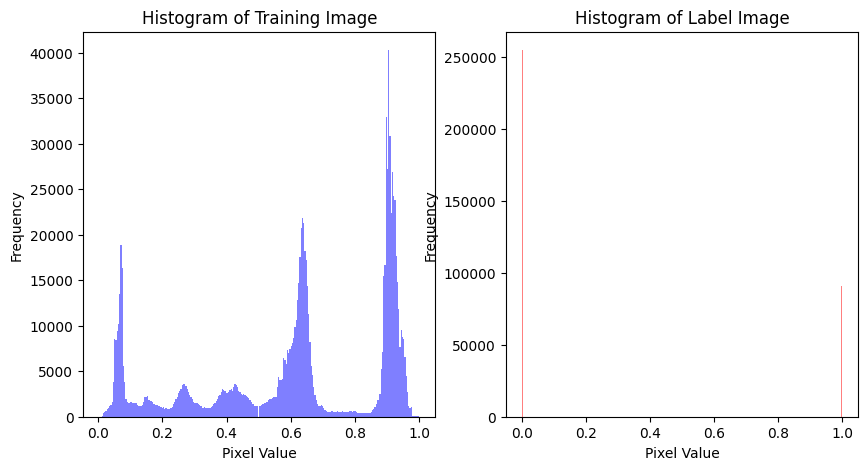

In [63]:
fig, ax = plt.subplots(1,2, figsize=(10, 5))

# Plot the histogram of the training image
ax[0].hist(image_test.flatten(), bins=256, color='b', alpha=0.5)
ax[0].set_xlabel('Pixel Value')
ax[0].set_ylabel('Frequency')
ax[0].set_title('Histogram of Training Image')

# Plot the histogram of the label image
ax[1].hist(label_test .flatten(), bins=256, color='r', alpha=0.5)
ax[1].set_xlabel('Pixel Value')
ax[1].set_ylabel('Frequency')
ax[1].set_title('Histogram of Label Image')

In [64]:
print(image_test.shape)
print(label_test.shape)

torch.Size([3, 480, 720])
torch.Size([1, 480, 720])


In [65]:
print(image_test.permute(1, 2, 0).shape)
print(label_test.permute(1, 2, 0).shape)

torch.Size([480, 720, 3])
torch.Size([480, 720, 1])


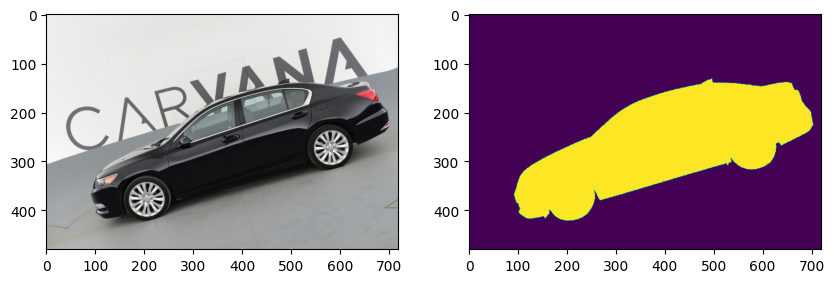

In [66]:
fig, ax = plt.subplots(1,2, figsize=(10, 5))

ax[0].imshow(image_test.permute(1, 2, 0))
ax[1].imshow(label_test.permute(1, 2, 0))

Lets test the dataloader object

In [67]:
train_loader

In [68]:
im_batch, lab_batch = next(iter(train_loader))

In [69]:
print(im_batch.shape)
print(lab_batch.shape)

torch.Size([16, 3, 480, 720])
torch.Size([16, 1, 480, 720])


Text(0.5, 1.0, 'Histogram of Label Image')

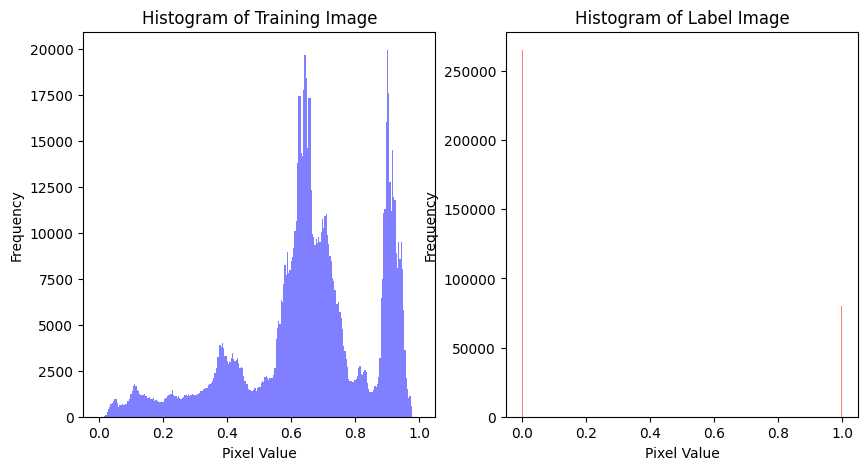

In [70]:
fig, ax = plt.subplots(1,2, figsize=(10, 5))

# Plot the histogram of the training image
ax[0].hist(im_batch[1,:,:,:].flatten(), bins=256, color='b', alpha=0.5)
ax[0].set_xlabel('Pixel Value')
ax[0].set_ylabel('Frequency')
ax[0].set_title('Histogram of Training Image')

# Plot the histogram of the label image
ax[1].hist(lab_batch[1,:,:,:].flatten(), bins=256, color='r', alpha=0.5)
ax[1].set_xlabel('Pixel Value')
ax[1].set_ylabel('Frequency')
ax[1].set_title('Histogram of Label Image')

### Unet Deep Network

Before Setting up the Unet Net work, lets define the dice function.
The Dice loss is a common loss function used in semantic segmentation tasks to measure the similarity between predicted and target segmentation masks

- The `smooth` variable is a small value (e.g., `1e-8`) added to the denominator to avoid division by zero.

- The `output` and `target` tensors are flattened using the `view` method with `-1` as the argument, which collapses the tensors into one-dimensional vectors. This allows element-wise operations between the two tensors.

- The `intersection` is calculated by element-wise multiplication of the flattened `output` and `target` tensors, followed by the sum of the resulting tensor.

- The `union` is calculated by summing the flattened `output` and `target` tensors separately.

- The Dice coefficient is computed as `(2 * intersection + smooth) / (union + smooth)`. It measures the overlap between the predicted and target masks.

- The loss is defined as `1 - dice`, which is subtracted from 1 to obtain the Dice loss. The loss value indicates the dissimilarity between the predicted and target masks, with higher values indicating higher dissimilarity.

- The calculated loss is returned as the output of the function.

In [71]:
def dice_loss(output, target):
    smooth = 1e-8  # smoothing factor to avoid division by zero
    output = output.view(-1)
    target = target.view(-1)

    intersection = torch.sum(output * target)
    union = torch.sum(output) + torch.sum(target)

    dice = (2.0 * intersection + smooth) / (union + smooth)
    loss = 1.0 - dice

    return loss

 The Unet class represents a U-Net model for image segmentation tasks. It contains encoder and decoder layers and uses the dice loss function as the loss criterion, see the structure below

In [72]:
from IPython.display import Image as IM2
IM2(url='https://github.com/guiwitz/DLImaging/raw/master/illustrations/unet.jpg', width=800)

In [73]:
class Unet(pl.LightningModule):
    def __init__(self, learning_rate):
        # The Unet class is defined as a subclass of pl.LightningModule.
        super(Unet, self).__init__()

        # This layer takes input tensors with 3 channels, applies 16 filters of
        # size 3x3, and uses padding to preserve spatial dimensions.
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3, padding=1)


        # This layer performs downsampling by selecting the maximum value
        # within each 2x2 window in the input feature maps, resulting in feature maps with reduced spatial dimensions
        self.maxpool1 = nn.MaxPool2d(kernel_size=2)


        # and so on....
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, padding=1)
        self.maxpool2 = nn.MaxPool2d(kernel_size=2)
        self.conv3 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1)

        # This layer takes input tensors with 64 channels, applies 32 filters
        # of size 2x2, and performs an upscaling operation with a stride of 2
        self.transpose_conv3 = nn.ConvTranspose2d(in_channels=64, out_channels=32, kernel_size=2, padding=0, stride=2)

        # and so on....
        self.conv2_t = nn.Conv2d(in_channels=64, out_channels=32, kernel_size=3, padding=1)
        self.transpose_conv2 = nn.ConvTranspose2d(in_channels=32, out_channels=16, kernel_size=2, padding=0, stride=2)
        self.conv1_t = nn.Conv2d(in_channels=32, out_channels=16, kernel_size=3, padding=1)
        self.conv_final = nn.Conv2d(in_channels=16, out_channels=1, kernel_size=1)

        #self.loss = nn.BCEWithLogitsLoss()
        self.loss = dice_loss

        self.learning_rate = learning_rate

    # The forward method defines the forward pass of the model. It takes an input
    # tensor x and performs the encoding and decoding steps of the U-Net architecture.
    def forward(self, x):
        x1 = F.relu(self.conv1(x))
        x = self.maxpool1(x1)
        x2 = F.relu(self.conv2(x))
        x = self.maxpool2(x2)
        x3 = F.relu(self.conv3(x))
        x2_t = self.transpose_conv3(x3)
        x = torch.cat((x2, x2_t), dim=1)
        x = F.relu(self.conv2_t(x))
        x = self.transpose_conv2(x)
        x = torch.cat((x1, x), dim=1)
        x = F.relu(self.conv1_t(x))
        x = self.conv_final(x)

        # By applying the sigmoid activation function to x, the resulting tensor
        # will have values ranging from 0 to 1.
        return x.sigmoid()

### Training of Unet

Epoch 1/151: 100%|██████████| 255/255 [06:24<00:00,  1.51s/it, loss=0.157]


Epoch 1/151 - Train Loss: 0.3189 - Validation Loss: 0.2360 - Accuracy: 0.9122 - IoU: 0.3821


Epoch 2/151: 100%|██████████| 255/255 [06:29<00:00,  1.53s/it, loss=0.183]


Epoch 2/151 - Train Loss: 0.2068 - Validation Loss: 0.1844 - Accuracy: 0.9248 - IoU: 0.4081


Epoch 3/151: 100%|██████████| 255/255 [06:26<00:00,  1.52s/it, loss=0.161]


Epoch 3/151 - Train Loss: 0.1825 - Validation Loss: 0.1931 - Accuracy: 0.9137 - IoU: 0.4044


Epoch 4/151: 100%|██████████| 255/255 [06:29<00:00,  1.53s/it, loss=0.22]


Epoch 4/151 - Train Loss: 0.1618 - Validation Loss: 0.1580 - Accuracy: 0.9379 - IoU: 0.4210


Epoch 5/151: 100%|██████████| 255/255 [06:28<00:00,  1.53s/it, loss=0.148]


Epoch 5/151 - Train Loss: 0.1505 - Validation Loss: 0.1398 - Accuracy: 0.9434 - IoU: 0.4301


Epoch 6/151: 100%|██████████| 255/255 [06:26<00:00,  1.52s/it, loss=0.198]


Epoch 6/151 - Train Loss: 0.1585 - Validation Loss: 0.1945 - Accuracy: 0.9157 - IoU: 0.4028


Epoch 7/151: 100%|██████████| 255/255 [06:30<00:00,  1.53s/it, loss=0.147]


Epoch 7/151 - Train Loss: 0.1611 - Validation Loss: 0.1366 - Accuracy: 0.9448 - IoU: 0.4318


Epoch 8/151: 100%|██████████| 255/255 [06:28<00:00,  1.52s/it, loss=0.215]


Epoch 8/151 - Train Loss: 0.1411 - Validation Loss: 0.2016 - Accuracy: 0.9165 - IoU: 0.3992


Epoch 9/151: 100%|██████████| 255/255 [06:27<00:00,  1.52s/it, loss=0.176]


Epoch 9/151 - Train Loss: 0.1667 - Validation Loss: 0.1970 - Accuracy: 0.9204 - IoU: 0.4015


Epoch 10/151: 100%|██████████| 255/255 [06:27<00:00,  1.52s/it, loss=0.322]


Epoch 10/151 - Train Loss: 0.1515 - Validation Loss: 0.3411 - Accuracy: 0.8904 - IoU: 0.3295


Epoch 11/151: 100%|██████████| 255/255 [06:23<00:00,  1.50s/it, loss=0.15]


Epoch 11/151 - Train Loss: 0.1751 - Validation Loss: 0.1332 - Accuracy: 0.9453 - IoU: 0.4335


Epoch 12/151: 100%|██████████| 255/255 [06:24<00:00,  1.51s/it, loss=0.126]


Epoch 12/151 - Train Loss: 0.1382 - Validation Loss: 0.1251 - Accuracy: 0.9486 - IoU: 0.4375


Epoch 13/151: 100%|██████████| 255/255 [06:26<00:00,  1.52s/it, loss=0.197]


Epoch 13/151 - Train Loss: 0.1728 - Validation Loss: 0.1807 - Accuracy: 0.9256 - IoU: 0.4096


Epoch 14/151: 100%|██████████| 255/255 [06:28<00:00,  1.52s/it, loss=0.245]


Epoch 14/151 - Train Loss: 0.1780 - Validation Loss: 0.2289 - Accuracy: 0.9169 - IoU: 0.3856


Epoch 15/151: 100%|██████████| 255/255 [06:26<00:00,  1.51s/it, loss=0.211]


Epoch 15/151 - Train Loss: 0.1829 - Validation Loss: 0.1756 - Accuracy: 0.9300 - IoU: 0.4122


Epoch 16/151: 100%|██████████| 255/255 [06:25<00:00,  1.51s/it, loss=0.161]


Epoch 16/151 - Train Loss: 0.1642 - Validation Loss: 0.1563 - Accuracy: 0.9390 - IoU: 0.4219


Epoch 17/151: 100%|██████████| 255/255 [06:27<00:00,  1.52s/it, loss=0.0957]


Epoch 17/151 - Train Loss: 0.1399 - Validation Loss: 0.1340 - Accuracy: 0.9451 - IoU: 0.4330


Epoch 18/151: 100%|██████████| 255/255 [06:25<00:00,  1.51s/it, loss=0.188]


Epoch 18/151 - Train Loss: 0.1336 - Validation Loss: 0.2072 - Accuracy: 0.9186 - IoU: 0.3964


Epoch 19/151: 100%|██████████| 255/255 [06:28<00:00,  1.52s/it, loss=0.139]


Epoch 19/151 - Train Loss: 0.1652 - Validation Loss: 0.1484 - Accuracy: 0.9390 - IoU: 0.4258


Epoch 20/151: 100%|██████████| 255/255 [06:23<00:00,  1.51s/it, loss=0.116]


Epoch 20/151 - Train Loss: 0.1425 - Validation Loss: 0.1269 - Accuracy: 0.9470 - IoU: 0.4366


Epoch 21/151: 100%|██████████| 255/255 [06:27<00:00,  1.52s/it, loss=0.186]


Epoch 21/151 - Train Loss: 0.1368 - Validation Loss: 0.1950 - Accuracy: 0.9223 - IoU: 0.4025


Epoch 22/151: 100%|██████████| 255/255 [06:24<00:00,  1.51s/it, loss=0.117]


Epoch 22/151 - Train Loss: 0.1530 - Validation Loss: 0.1370 - Accuracy: 0.9445 - IoU: 0.4315


Epoch 23/151: 100%|██████████| 255/255 [06:25<00:00,  1.51s/it, loss=0.137]


Epoch 23/151 - Train Loss: 0.1350 - Validation Loss: 0.1508 - Accuracy: 0.9388 - IoU: 0.4246


Epoch 24/151: 100%|██████████| 255/255 [06:28<00:00,  1.53s/it, loss=0.108]


Epoch 24/151 - Train Loss: 0.1325 - Validation Loss: 0.1200 - Accuracy: 0.9501 - IoU: 0.4400


Epoch 25/151: 100%|██████████| 255/255 [06:26<00:00,  1.51s/it, loss=0.128]


Epoch 25/151 - Train Loss: 0.1412 - Validation Loss: 0.1445 - Accuracy: 0.9421 - IoU: 0.4277


Epoch 26/151: 100%|██████████| 255/255 [06:24<00:00,  1.51s/it, loss=0.117]


Epoch 26/151 - Train Loss: 0.1231 - Validation Loss: 0.1123 - Accuracy: 0.9533 - IoU: 0.4439


Epoch 27/151: 100%|██████████| 255/255 [06:22<00:00,  1.50s/it, loss=0.146]


Epoch 27/151 - Train Loss: 0.1108 - Validation Loss: 0.1147 - Accuracy: 0.9510 - IoU: 0.4426


Epoch 28/151: 100%|██████████| 255/255 [06:25<00:00,  1.51s/it, loss=0.137]


Epoch 28/151 - Train Loss: 0.1064 - Validation Loss: 0.1093 - Accuracy: 0.9543 - IoU: 0.4454


Epoch 29/151: 100%|██████████| 255/255 [06:28<00:00,  1.52s/it, loss=0.173]


Epoch 29/151 - Train Loss: 0.1058 - Validation Loss: 0.1410 - Accuracy: 0.9422 - IoU: 0.4295


Epoch 30/151: 100%|██████████| 255/255 [06:29<00:00,  1.53s/it, loss=0.0906]


Epoch 30/151 - Train Loss: 0.1136 - Validation Loss: 0.1123 - Accuracy: 0.9541 - IoU: 0.4439


Epoch 31/151: 100%|██████████| 255/255 [06:26<00:00,  1.52s/it, loss=0.121]


Epoch 31/151 - Train Loss: 0.1267 - Validation Loss: 0.1005 - Accuracy: 0.9580 - IoU: 0.4498


Epoch 32/151: 100%|██████████| 255/255 [06:25<00:00,  1.51s/it, loss=0.0731]


Epoch 32/151 - Train Loss: 0.1013 - Validation Loss: 0.0971 - Accuracy: 0.9597 - IoU: 0.4515


Epoch 33/151: 100%|██████████| 255/255 [06:23<00:00,  1.50s/it, loss=0.0904]


Epoch 33/151 - Train Loss: 0.0969 - Validation Loss: 0.1144 - Accuracy: 0.9546 - IoU: 0.4428


Epoch 34/151: 100%|██████████| 255/255 [06:23<00:00,  1.50s/it, loss=0.0767]


Epoch 34/151 - Train Loss: 0.0927 - Validation Loss: 0.0932 - Accuracy: 0.9616 - IoU: 0.4534


Epoch 35/151: 100%|██████████| 255/255 [06:27<00:00,  1.52s/it, loss=0.0948]


Epoch 35/151 - Train Loss: 0.0980 - Validation Loss: 0.0966 - Accuracy: 0.9597 - IoU: 0.4517


Epoch 36/151: 100%|██████████| 255/255 [06:26<00:00,  1.52s/it, loss=0.0922]


Epoch 36/151 - Train Loss: 0.0873 - Validation Loss: 0.0891 - Accuracy: 0.9619 - IoU: 0.4555


Epoch 37/151: 100%|██████████| 255/255 [06:30<00:00,  1.53s/it, loss=0.0764]


Epoch 37/151 - Train Loss: 0.0837 - Validation Loss: 0.0820 - Accuracy: 0.9658 - IoU: 0.4591


Epoch 38/151: 100%|██████████| 255/255 [06:29<00:00,  1.53s/it, loss=0.0894]


Epoch 38/151 - Train Loss: 0.0821 - Validation Loss: 0.0805 - Accuracy: 0.9660 - IoU: 0.4598


Epoch 39/151: 100%|██████████| 255/255 [06:29<00:00,  1.53s/it, loss=0.0409]


Epoch 39/151 - Train Loss: 0.0848 - Validation Loss: 0.0818 - Accuracy: 0.9664 - IoU: 0.4592


Epoch 40/151: 100%|██████████| 255/255 [06:32<00:00,  1.54s/it, loss=0.0664]


Epoch 40/151 - Train Loss: 0.0783 - Validation Loss: 0.0817 - Accuracy: 0.9649 - IoU: 0.4592


Epoch 41/151: 100%|██████████| 255/255 [06:32<00:00,  1.54s/it, loss=0.111]


Epoch 41/151 - Train Loss: 0.0776 - Validation Loss: 0.0822 - Accuracy: 0.9648 - IoU: 0.4590


Epoch 42/151: 100%|██████████| 255/255 [06:31<00:00,  1.53s/it, loss=0.0585]


Epoch 42/151 - Train Loss: 0.0757 - Validation Loss: 0.0762 - Accuracy: 0.9686 - IoU: 0.4619


Epoch 43/151: 100%|██████████| 255/255 [06:33<00:00,  1.54s/it, loss=0.0862]


Epoch 43/151 - Train Loss: 0.0748 - Validation Loss: 0.0744 - Accuracy: 0.9686 - IoU: 0.4628


Epoch 44/151: 100%|██████████| 255/255 [06:31<00:00,  1.54s/it, loss=0.0583]


Epoch 44/151 - Train Loss: 0.0711 - Validation Loss: 0.0729 - Accuracy: 0.9699 - IoU: 0.4636


Epoch 45/151: 100%|██████████| 255/255 [06:29<00:00,  1.53s/it, loss=0.0735]


Epoch 45/151 - Train Loss: 0.0710 - Validation Loss: 0.0729 - Accuracy: 0.9691 - IoU: 0.4636


Epoch 46/151: 100%|██████████| 255/255 [06:28<00:00,  1.52s/it, loss=0.108]


Epoch 46/151 - Train Loss: 0.0705 - Validation Loss: 0.0784 - Accuracy: 0.9676 - IoU: 0.4608


Epoch 47/151: 100%|██████████| 255/255 [06:27<00:00,  1.52s/it, loss=0.0432]


Epoch 47/151 - Train Loss: 0.0706 - Validation Loss: 0.0687 - Accuracy: 0.9717 - IoU: 0.4657


Epoch 48/151: 100%|██████████| 255/255 [06:32<00:00,  1.54s/it, loss=0.0788]


Epoch 48/151 - Train Loss: 0.0693 - Validation Loss: 0.0895 - Accuracy: 0.9643 - IoU: 0.4553


Epoch 49/151: 100%|██████████| 255/255 [06:25<00:00,  1.51s/it, loss=0.0708]


Epoch 49/151 - Train Loss: 0.0686 - Validation Loss: 0.0645 - Accuracy: 0.9727 - IoU: 0.4678


Epoch 50/151: 100%|██████████| 255/255 [06:27<00:00,  1.52s/it, loss=0.08]


Epoch 50/151 - Train Loss: 0.0647 - Validation Loss: 0.0650 - Accuracy: 0.9725 - IoU: 0.4675


Epoch 51/151: 100%|██████████| 255/255 [06:26<00:00,  1.51s/it, loss=0.0888]


Epoch 51/151 - Train Loss: 0.0753 - Validation Loss: 0.0683 - Accuracy: 0.9712 - IoU: 0.4659


Epoch 52/151: 100%|██████████| 255/255 [06:25<00:00,  1.51s/it, loss=0.0812]


Epoch 52/151 - Train Loss: 0.0740 - Validation Loss: 0.0718 - Accuracy: 0.9694 - IoU: 0.4641


Epoch 53/151: 100%|██████████| 255/255 [06:27<00:00,  1.52s/it, loss=0.0695]


Epoch 53/151 - Train Loss: 0.0684 - Validation Loss: 0.0756 - Accuracy: 0.9679 - IoU: 0.4622


Epoch 54/151: 100%|██████████| 255/255 [06:23<00:00,  1.50s/it, loss=0.0432]


Epoch 54/151 - Train Loss: 0.0659 - Validation Loss: 0.0647 - Accuracy: 0.9731 - IoU: 0.4677


Epoch 55/151: 100%|██████████| 255/255 [06:23<00:00,  1.50s/it, loss=0.0849]


Epoch 55/151 - Train Loss: 0.0665 - Validation Loss: 0.0716 - Accuracy: 0.9695 - IoU: 0.4642


Epoch 56/151: 100%|██████████| 255/255 [06:25<00:00,  1.51s/it, loss=0.0708]


Epoch 56/151 - Train Loss: 0.0629 - Validation Loss: 0.0764 - Accuracy: 0.9668 - IoU: 0.4619


Epoch 57/151: 100%|██████████| 255/255 [06:28<00:00,  1.52s/it, loss=0.13]


Epoch 57/151 - Train Loss: 0.1018 - Validation Loss: 0.1280 - Accuracy: 0.9478 - IoU: 0.4360


Epoch 58/151: 100%|██████████| 255/255 [06:28<00:00,  1.53s/it, loss=0.0918]


Epoch 58/151 - Train Loss: 0.1008 - Validation Loss: 0.0847 - Accuracy: 0.9651 - IoU: 0.4577


Epoch 59/151: 100%|██████████| 255/255 [06:25<00:00,  1.51s/it, loss=0.0862]


Epoch 59/151 - Train Loss: 0.0760 - Validation Loss: 0.0778 - Accuracy: 0.9674 - IoU: 0.4611


Epoch 60/151: 100%|██████████| 255/255 [06:22<00:00,  1.50s/it, loss=0.0758]


Epoch 60/151 - Train Loss: 0.0704 - Validation Loss: 0.0750 - Accuracy: 0.9685 - IoU: 0.4625


Epoch 61/151: 100%|██████████| 255/255 [06:27<00:00,  1.52s/it, loss=0.0771]


Epoch 61/151 - Train Loss: 0.0664 - Validation Loss: 0.0624 - Accuracy: 0.9739 - IoU: 0.4688


Epoch 62/151: 100%|██████████| 255/255 [06:24<00:00,  1.51s/it, loss=0.0621]


Epoch 62/151 - Train Loss: 0.0640 - Validation Loss: 0.0644 - Accuracy: 0.9731 - IoU: 0.4678


Epoch 63/151: 100%|██████████| 255/255 [06:25<00:00,  1.51s/it, loss=0.0546]


Epoch 63/151 - Train Loss: 0.0625 - Validation Loss: 0.0647 - Accuracy: 0.9733 - IoU: 0.4676


Epoch 64/151: 100%|██████████| 255/255 [06:28<00:00,  1.52s/it, loss=0.0312]


Epoch 64/151 - Train Loss: 0.0635 - Validation Loss: 0.0603 - Accuracy: 0.9750 - IoU: 0.4699


Epoch 65/151: 100%|██████████| 255/255 [06:30<00:00,  1.53s/it, loss=0.077]


Epoch 65/151 - Train Loss: 0.0590 - Validation Loss: 0.0591 - Accuracy: 0.9752 - IoU: 0.4705


Epoch 66/151: 100%|██████████| 255/255 [06:27<00:00,  1.52s/it, loss=0.056]


Epoch 66/151 - Train Loss: 0.0584 - Validation Loss: 0.0621 - Accuracy: 0.9735 - IoU: 0.4690


Epoch 67/151: 100%|██████████| 255/255 [06:26<00:00,  1.52s/it, loss=0.0622]


Epoch 67/151 - Train Loss: 0.0564 - Validation Loss: 0.0567 - Accuracy: 0.9765 - IoU: 0.4717


Epoch 68/151: 100%|██████████| 255/255 [06:24<00:00,  1.51s/it, loss=0.0367]


Epoch 68/151 - Train Loss: 0.0549 - Validation Loss: 0.0581 - Accuracy: 0.9761 - IoU: 0.4710


Epoch 69/151: 100%|██████████| 255/255 [06:26<00:00,  1.51s/it, loss=0.0418]


Epoch 69/151 - Train Loss: 0.0550 - Validation Loss: 0.0561 - Accuracy: 0.9762 - IoU: 0.4720


Epoch 70/151: 100%|██████████| 255/255 [06:27<00:00,  1.52s/it, loss=0.0349]


Epoch 70/151 - Train Loss: 0.0544 - Validation Loss: 0.0531 - Accuracy: 0.9776 - IoU: 0.4735


Epoch 71/151: 100%|██████████| 255/255 [06:27<00:00,  1.52s/it, loss=0.0658]


Epoch 71/151 - Train Loss: 0.0545 - Validation Loss: 0.0610 - Accuracy: 0.9750 - IoU: 0.4695


Epoch 72/151: 100%|██████████| 255/255 [06:25<00:00,  1.51s/it, loss=0.0278]


Epoch 72/151 - Train Loss: 0.0541 - Validation Loss: 0.0535 - Accuracy: 0.9774 - IoU: 0.4733


Epoch 73/151: 100%|██████████| 255/255 [06:25<00:00,  1.51s/it, loss=0.0609]


Epoch 73/151 - Train Loss: 0.0528 - Validation Loss: 0.0573 - Accuracy: 0.9764 - IoU: 0.4714


Epoch 74/151: 100%|██████████| 255/255 [06:23<00:00,  1.50s/it, loss=0.0716]


Epoch 74/151 - Train Loss: 0.0515 - Validation Loss: 0.0517 - Accuracy: 0.9786 - IoU: 0.4742


Epoch 75/151: 100%|██████████| 255/255 [06:25<00:00,  1.51s/it, loss=0.0344]


Epoch 75/151 - Train Loss: 0.0514 - Validation Loss: 0.0506 - Accuracy: 0.9789 - IoU: 0.4747


Epoch 76/151: 100%|██████████| 255/255 [06:27<00:00,  1.52s/it, loss=0.0529]


Epoch 76/151 - Train Loss: 0.0491 - Validation Loss: 0.0487 - Accuracy: 0.9798 - IoU: 0.4757


Epoch 77/151: 100%|██████████| 255/255 [06:22<00:00,  1.50s/it, loss=0.0444]


Epoch 77/151 - Train Loss: 0.0515 - Validation Loss: 0.0532 - Accuracy: 0.9778 - IoU: 0.4734


Epoch 78/151: 100%|██████████| 255/255 [06:24<00:00,  1.51s/it, loss=0.0965]


Epoch 78/151 - Train Loss: 0.0891 - Validation Loss: 0.1028 - Accuracy: 0.9564 - IoU: 0.4486


Epoch 79/151: 100%|██████████| 255/255 [06:27<00:00,  1.52s/it, loss=0.0591]


Epoch 79/151 - Train Loss: 0.0715 - Validation Loss: 0.0587 - Accuracy: 0.9758 - IoU: 0.4706


Epoch 80/151: 100%|██████████| 255/255 [06:25<00:00,  1.51s/it, loss=0.0397]


Epoch 80/151 - Train Loss: 0.0559 - Validation Loss: 0.0520 - Accuracy: 0.9782 - IoU: 0.4740


Epoch 81/151: 100%|██████████| 255/255 [06:28<00:00,  1.52s/it, loss=0.0975]


Epoch 81/151 - Train Loss: 0.0611 - Validation Loss: 0.0522 - Accuracy: 0.9783 - IoU: 0.4739


Epoch 82/151: 100%|██████████| 255/255 [06:27<00:00,  1.52s/it, loss=0.0596]


Epoch 82/151 - Train Loss: 0.0514 - Validation Loss: 0.0529 - Accuracy: 0.9776 - IoU: 0.4735


Epoch 83/151: 100%|██████████| 255/255 [06:28<00:00,  1.52s/it, loss=0.0833]


Epoch 83/151 - Train Loss: 0.0599 - Validation Loss: 0.0666 - Accuracy: 0.9723 - IoU: 0.4667


Epoch 84/151: 100%|██████████| 255/255 [06:28<00:00,  1.53s/it, loss=0.0432]


Epoch 84/151 - Train Loss: 0.0547 - Validation Loss: 0.0499 - Accuracy: 0.9790 - IoU: 0.4751


Epoch 85/151: 100%|██████████| 255/255 [06:30<00:00,  1.53s/it, loss=0.0349]


Epoch 85/151 - Train Loss: 0.0475 - Validation Loss: 0.0483 - Accuracy: 0.9798 - IoU: 0.4759


Epoch 86/151: 100%|██████████| 255/255 [06:27<00:00,  1.52s/it, loss=0.0569]


Epoch 86/151 - Train Loss: 0.0484 - Validation Loss: 0.0562 - Accuracy: 0.9768 - IoU: 0.4719


Epoch 87/151: 100%|██████████| 255/255 [06:31<00:00,  1.54s/it, loss=0.0777]


Epoch 87/151 - Train Loss: 0.0491 - Validation Loss: 0.0499 - Accuracy: 0.9793 - IoU: 0.4750


Epoch 88/151: 100%|██████████| 255/255 [06:33<00:00,  1.54s/it, loss=0.06]


Epoch 88/151 - Train Loss: 0.0460 - Validation Loss: 0.0467 - Accuracy: 0.9803 - IoU: 0.4767


Epoch 89/151: 100%|██████████| 255/255 [06:34<00:00,  1.55s/it, loss=0.0254]


Epoch 89/151 - Train Loss: 0.0466 - Validation Loss: 0.0459 - Accuracy: 0.9807 - IoU: 0.4771


Epoch 90/151: 100%|██████████| 255/255 [06:27<00:00,  1.52s/it, loss=0.028]


Epoch 90/151 - Train Loss: 0.0446 - Validation Loss: 0.0482 - Accuracy: 0.9802 - IoU: 0.4759


Epoch 91/151: 100%|██████████| 255/255 [06:31<00:00,  1.53s/it, loss=0.0325]


Epoch 91/151 - Train Loss: 0.0478 - Validation Loss: 0.0449 - Accuracy: 0.9813 - IoU: 0.4776


Epoch 92/151: 100%|██████████| 255/255 [06:29<00:00,  1.53s/it, loss=0.0489]


Epoch 92/151 - Train Loss: 0.0445 - Validation Loss: 0.0469 - Accuracy: 0.9805 - IoU: 0.4766


Epoch 93/151: 100%|██████████| 255/255 [06:29<00:00,  1.53s/it, loss=0.0428]


Epoch 93/151 - Train Loss: 0.0476 - Validation Loss: 0.0530 - Accuracy: 0.9781 - IoU: 0.4735


Epoch 94/151: 100%|██████████| 255/255 [06:30<00:00,  1.53s/it, loss=0.0454]


Epoch 94/151 - Train Loss: 0.0461 - Validation Loss: 0.0451 - Accuracy: 0.9810 - IoU: 0.4775


Epoch 95/151: 100%|██████████| 255/255 [06:31<00:00,  1.54s/it, loss=0.0628]


Epoch 95/151 - Train Loss: 0.0436 - Validation Loss: 0.0441 - Accuracy: 0.9815 - IoU: 0.4780


Epoch 96/151: 100%|██████████| 255/255 [06:29<00:00,  1.53s/it, loss=0.135]


Epoch 96/151 - Train Loss: 0.0808 - Validation Loss: 0.1642 - Accuracy: 0.9353 - IoU: 0.4179


Epoch 97/151: 100%|██████████| 255/255 [06:33<00:00,  1.54s/it, loss=0.0922]


Epoch 97/151 - Train Loss: 0.1068 - Validation Loss: 0.0795 - Accuracy: 0.9669 - IoU: 0.4603


Epoch 98/151: 100%|██████████| 255/255 [06:31<00:00,  1.54s/it, loss=0.0559]


Epoch 98/151 - Train Loss: 0.0712 - Validation Loss: 0.0658 - Accuracy: 0.9724 - IoU: 0.4671


Epoch 99/151: 100%|██████████| 255/255 [06:30<00:00,  1.53s/it, loss=0.073]


Epoch 99/151 - Train Loss: 0.0606 - Validation Loss: 0.0573 - Accuracy: 0.9760 - IoU: 0.4713


Epoch 100/151: 100%|██████████| 255/255 [06:29<00:00,  1.53s/it, loss=0.0789]


Epoch 100/151 - Train Loss: 0.0545 - Validation Loss: 0.0663 - Accuracy: 0.9726 - IoU: 0.4669


Epoch 101/151: 100%|██████████| 255/255 [06:28<00:00,  1.52s/it, loss=0.0564]


Epoch 101/151 - Train Loss: 0.0558 - Validation Loss: 0.0493 - Accuracy: 0.9794 - IoU: 0.4753


Epoch 102/151: 100%|██████████| 255/255 [06:32<00:00,  1.54s/it, loss=0.0514]


Epoch 102/151 - Train Loss: 0.0491 - Validation Loss: 0.0489 - Accuracy: 0.9797 - IoU: 0.4755


Epoch 103/151: 100%|██████████| 255/255 [06:30<00:00,  1.53s/it, loss=0.0373]


Epoch 103/151 - Train Loss: 0.0478 - Validation Loss: 0.0470 - Accuracy: 0.9803 - IoU: 0.4765


Epoch 104/151: 100%|██████████| 255/255 [06:33<00:00,  1.54s/it, loss=0.0455]


Epoch 104/151 - Train Loss: 0.0491 - Validation Loss: 0.0567 - Accuracy: 0.9763 - IoU: 0.4716


Epoch 105/151: 100%|██████████| 255/255 [06:28<00:00,  1.53s/it, loss=0.0661]


Epoch 105/151 - Train Loss: 0.0471 - Validation Loss: 0.0464 - Accuracy: 0.9806 - IoU: 0.4768


Epoch 106/151: 100%|██████████| 255/255 [06:29<00:00,  1.53s/it, loss=0.0481]


Epoch 106/151 - Train Loss: 0.0462 - Validation Loss: 0.0449 - Accuracy: 0.9814 - IoU: 0.4776


Epoch 107/151: 100%|██████████| 255/255 [06:25<00:00,  1.51s/it, loss=0.035]


Epoch 107/151 - Train Loss: 0.0435 - Validation Loss: 0.0428 - Accuracy: 0.9822 - IoU: 0.4786


Epoch 108/151: 100%|██████████| 255/255 [06:31<00:00,  1.54s/it, loss=0.0472]


Epoch 108/151 - Train Loss: 0.0555 - Validation Loss: 0.0530 - Accuracy: 0.9782 - IoU: 0.4735


Epoch 109/151: 100%|██████████| 255/255 [06:36<00:00,  1.55s/it, loss=0.0508]


Epoch 109/151 - Train Loss: 0.0484 - Validation Loss: 0.0454 - Accuracy: 0.9809 - IoU: 0.4773


Epoch 110/151: 100%|██████████| 255/255 [06:31<00:00,  1.53s/it, loss=0.0529]


Epoch 110/151 - Train Loss: 0.0426 - Validation Loss: 0.0464 - Accuracy: 0.9809 - IoU: 0.4768


Epoch 111/151: 100%|██████████| 255/255 [06:29<00:00,  1.53s/it, loss=0.0432]


Epoch 111/151 - Train Loss: 0.0438 - Validation Loss: 0.0418 - Accuracy: 0.9826 - IoU: 0.4791


Epoch 112/151: 100%|██████████| 255/255 [06:33<00:00,  1.54s/it, loss=0.041]


Epoch 112/151 - Train Loss: 0.0416 - Validation Loss: 0.0435 - Accuracy: 0.9819 - IoU: 0.4783


Epoch 113/151: 100%|██████████| 255/255 [06:29<00:00,  1.53s/it, loss=0.0629]


Epoch 113/151 - Train Loss: 0.0433 - Validation Loss: 0.0441 - Accuracy: 0.9816 - IoU: 0.4779


Epoch 114/151: 100%|██████████| 255/255 [06:30<00:00,  1.53s/it, loss=0.0327]


Epoch 114/151 - Train Loss: 0.0420 - Validation Loss: 0.0431 - Accuracy: 0.9821 - IoU: 0.4785


Epoch 115/151: 100%|██████████| 255/255 [06:30<00:00,  1.53s/it, loss=0.0503]


Epoch 115/151 - Train Loss: 0.0406 - Validation Loss: 0.0456 - Accuracy: 0.9809 - IoU: 0.4772


Epoch 116/151: 100%|██████████| 255/255 [06:31<00:00,  1.53s/it, loss=0.0505]


Epoch 116/151 - Train Loss: 0.0404 - Validation Loss: 0.0418 - Accuracy: 0.9823 - IoU: 0.4791


Epoch 117/151: 100%|██████████| 255/255 [06:29<00:00,  1.53s/it, loss=0.0529]


Epoch 117/151 - Train Loss: 0.0432 - Validation Loss: 0.0402 - Accuracy: 0.9832 - IoU: 0.4799


Epoch 118/151: 100%|██████████| 255/255 [06:27<00:00,  1.52s/it, loss=0.0614]


Epoch 118/151 - Train Loss: 0.0504 - Validation Loss: 0.0455 - Accuracy: 0.9809 - IoU: 0.4773


Epoch 119/151: 100%|██████████| 255/255 [06:28<00:00,  1.53s/it, loss=0.0501]


Epoch 119/151 - Train Loss: 0.0456 - Validation Loss: 0.0438 - Accuracy: 0.9818 - IoU: 0.4781


Epoch 120/151: 100%|██████████| 255/255 [06:25<00:00,  1.51s/it, loss=0.0378]


Epoch 120/151 - Train Loss: 0.0413 - Validation Loss: 0.0415 - Accuracy: 0.9827 - IoU: 0.4793


Epoch 121/151: 100%|██████████| 255/255 [06:27<00:00,  1.52s/it, loss=0.0312]


Epoch 121/151 - Train Loss: 0.0399 - Validation Loss: 0.0439 - Accuracy: 0.9817 - IoU: 0.4781


Epoch 122/151: 100%|██████████| 255/255 [06:26<00:00,  1.52s/it, loss=0.0334]


Epoch 122/151 - Train Loss: 0.0397 - Validation Loss: 0.0383 - Accuracy: 0.9841 - IoU: 0.4809


Epoch 123/151: 100%|██████████| 255/255 [06:24<00:00,  1.51s/it, loss=0.0347]


Epoch 123/151 - Train Loss: 0.0461 - Validation Loss: 0.0518 - Accuracy: 0.9784 - IoU: 0.4741


Epoch 124/151: 100%|██████████| 255/255 [06:30<00:00,  1.53s/it, loss=0.0498]


Epoch 124/151 - Train Loss: 0.0435 - Validation Loss: 0.0396 - Accuracy: 0.9835 - IoU: 0.4802


Epoch 125/151: 100%|██████████| 255/255 [06:29<00:00,  1.53s/it, loss=0.0654]


Epoch 125/151 - Train Loss: 0.0408 - Validation Loss: 0.0479 - Accuracy: 0.9798 - IoU: 0.4761


Epoch 126/151: 100%|██████████| 255/255 [06:28<00:00,  1.52s/it, loss=0.0386]


Epoch 126/151 - Train Loss: 0.0392 - Validation Loss: 0.0414 - Accuracy: 0.9829 - IoU: 0.4793


Epoch 127/151: 100%|██████████| 255/255 [06:31<00:00,  1.54s/it, loss=0.0437]


Epoch 127/151 - Train Loss: 0.0416 - Validation Loss: 0.0438 - Accuracy: 0.9818 - IoU: 0.4781


Epoch 128/151: 100%|██████████| 255/255 [06:30<00:00,  1.53s/it, loss=0.025]


Epoch 128/151 - Train Loss: 0.0393 - Validation Loss: 0.0423 - Accuracy: 0.9822 - IoU: 0.4788


Epoch 129/151: 100%|██████████| 255/255 [06:28<00:00,  1.52s/it, loss=0.0423]


Epoch 129/151 - Train Loss: 0.0402 - Validation Loss: 0.0398 - Accuracy: 0.9833 - IoU: 0.4801


Epoch 130/151: 100%|██████████| 255/255 [06:29<00:00,  1.53s/it, loss=0.0449]


Epoch 130/151 - Train Loss: 0.0378 - Validation Loss: 0.0393 - Accuracy: 0.9836 - IoU: 0.4804


Epoch 131/151: 100%|██████████| 255/255 [06:26<00:00,  1.52s/it, loss=0.0294]


Epoch 131/151 - Train Loss: 0.0377 - Validation Loss: 0.0365 - Accuracy: 0.9847 - IoU: 0.4817


Epoch 132/151: 100%|██████████| 255/255 [06:32<00:00,  1.54s/it, loss=0.0199]


Epoch 132/151 - Train Loss: 0.0387 - Validation Loss: 0.0433 - Accuracy: 0.9819 - IoU: 0.4784


Epoch 133/151: 100%|██████████| 255/255 [06:26<00:00,  1.52s/it, loss=0.0283]


Epoch 133/151 - Train Loss: 0.0384 - Validation Loss: 0.0434 - Accuracy: 0.9815 - IoU: 0.4783


Epoch 134/151: 100%|██████████| 255/255 [06:26<00:00,  1.52s/it, loss=0.0384]


Epoch 134/151 - Train Loss: 0.0368 - Validation Loss: 0.0342 - Accuracy: 0.9856 - IoU: 0.4829


Epoch 135/151: 100%|██████████| 255/255 [06:25<00:00,  1.51s/it, loss=0.0617]


Epoch 135/151 - Train Loss: 0.0371 - Validation Loss: 0.0535 - Accuracy: 0.9776 - IoU: 0.4733


Epoch 136/151: 100%|██████████| 255/255 [06:23<00:00,  1.50s/it, loss=0.0606]


Epoch 136/151 - Train Loss: 0.0437 - Validation Loss: 0.0427 - Accuracy: 0.9824 - IoU: 0.4787


Epoch 137/151: 100%|██████████| 255/255 [06:26<00:00,  1.51s/it, loss=0.0357]


Epoch 137/151 - Train Loss: 0.0376 - Validation Loss: 0.0359 - Accuracy: 0.9849 - IoU: 0.4821


Epoch 138/151: 100%|██████████| 255/255 [06:27<00:00,  1.52s/it, loss=0.0219]


Epoch 138/151 - Train Loss: 0.0359 - Validation Loss: 0.0355 - Accuracy: 0.9851 - IoU: 0.4823


Epoch 139/151: 100%|██████████| 255/255 [06:25<00:00,  1.51s/it, loss=0.044]


Epoch 139/151 - Train Loss: 0.0374 - Validation Loss: 0.0363 - Accuracy: 0.9849 - IoU: 0.4819


Epoch 140/151: 100%|██████████| 255/255 [06:28<00:00,  1.52s/it, loss=0.0384]


Epoch 140/151 - Train Loss: 0.0357 - Validation Loss: 0.0385 - Accuracy: 0.9840 - IoU: 0.4808


Epoch 141/151: 100%|██████████| 255/255 [06:25<00:00,  1.51s/it, loss=0.0206]


Epoch 141/151 - Train Loss: 0.0356 - Validation Loss: 0.0363 - Accuracy: 0.9849 - IoU: 0.4818


Epoch 142/151: 100%|██████████| 255/255 [06:25<00:00,  1.51s/it, loss=0.0527]


Epoch 142/151 - Train Loss: 0.0369 - Validation Loss: 0.0436 - Accuracy: 0.9819 - IoU: 0.4782


Epoch 143/151: 100%|██████████| 255/255 [06:26<00:00,  1.51s/it, loss=0.0302]


Epoch 143/151 - Train Loss: 0.0346 - Validation Loss: 0.0354 - Accuracy: 0.9853 - IoU: 0.4823


Epoch 144/151: 100%|██████████| 255/255 [06:30<00:00,  1.53s/it, loss=0.0374]


Epoch 144/151 - Train Loss: 0.0351 - Validation Loss: 0.0324 - Accuracy: 0.9864 - IoU: 0.4838


Epoch 145/151: 100%|██████████| 255/255 [06:28<00:00,  1.53s/it, loss=0.0382]


Epoch 145/151 - Train Loss: 0.0368 - Validation Loss: 0.0344 - Accuracy: 0.9856 - IoU: 0.4828


Epoch 146/151: 100%|██████████| 255/255 [06:30<00:00,  1.53s/it, loss=0.0478]


Epoch 146/151 - Train Loss: 0.0340 - Validation Loss: 0.0454 - Accuracy: 0.9806 - IoU: 0.4774


Epoch 147/151: 100%|██████████| 255/255 [06:33<00:00,  1.54s/it, loss=0.0378]


Epoch 147/151 - Train Loss: 0.0350 - Validation Loss: 0.0363 - Accuracy: 0.9849 - IoU: 0.4819


Epoch 148/151: 100%|██████████| 255/255 [06:26<00:00,  1.52s/it, loss=0.0322]


Epoch 148/151 - Train Loss: 0.0353 - Validation Loss: 0.0368 - Accuracy: 0.9847 - IoU: 0.4816


Epoch 149/151: 100%|██████████| 255/255 [06:28<00:00,  1.53s/it, loss=0.0231]


Epoch 149/151 - Train Loss: 0.0349 - Validation Loss: 0.0363 - Accuracy: 0.9848 - IoU: 0.4819


Epoch 150/151: 100%|██████████| 255/255 [06:31<00:00,  1.54s/it, loss=0.0254]


Epoch 150/151 - Train Loss: 0.0357 - Validation Loss: 0.0359 - Accuracy: 0.9849 - IoU: 0.4821


Epoch 151/151: 100%|██████████| 255/255 [06:30<00:00,  1.53s/it, loss=0.0513]


Epoch 151/151 - Train Loss: 0.0346 - Validation Loss: 0.0477 - Accuracy: 0.9799 - IoU: 0.4762
Elapsed time: 70135.44096827507 seconds


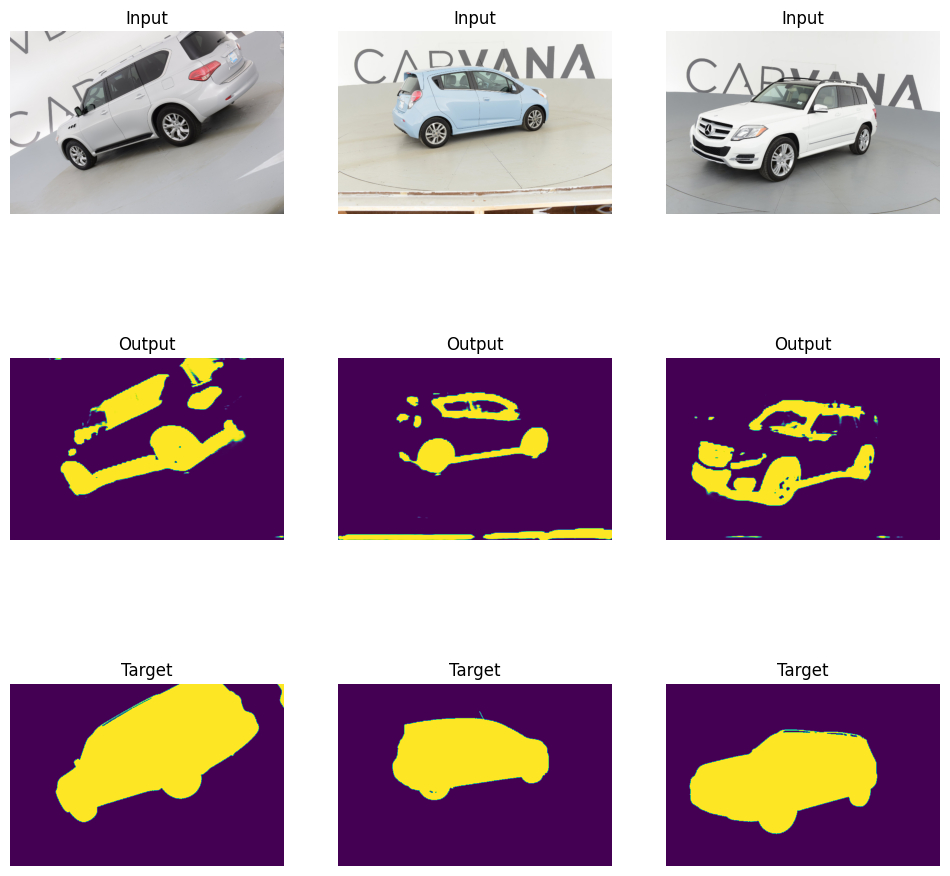

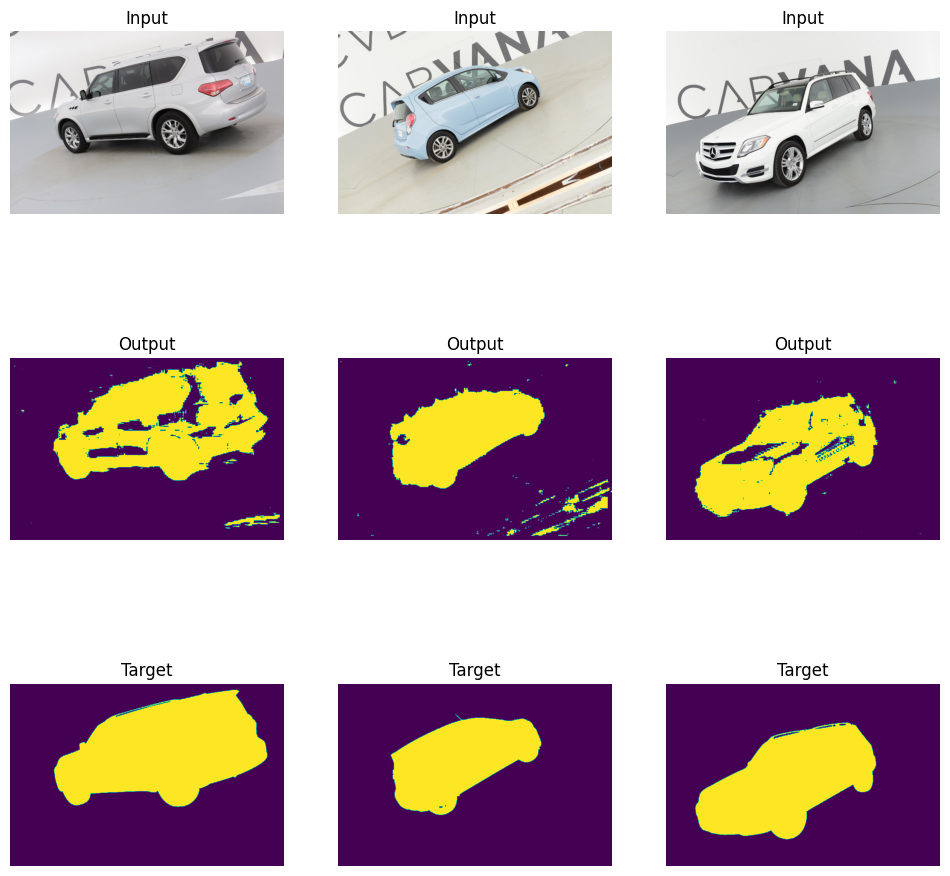

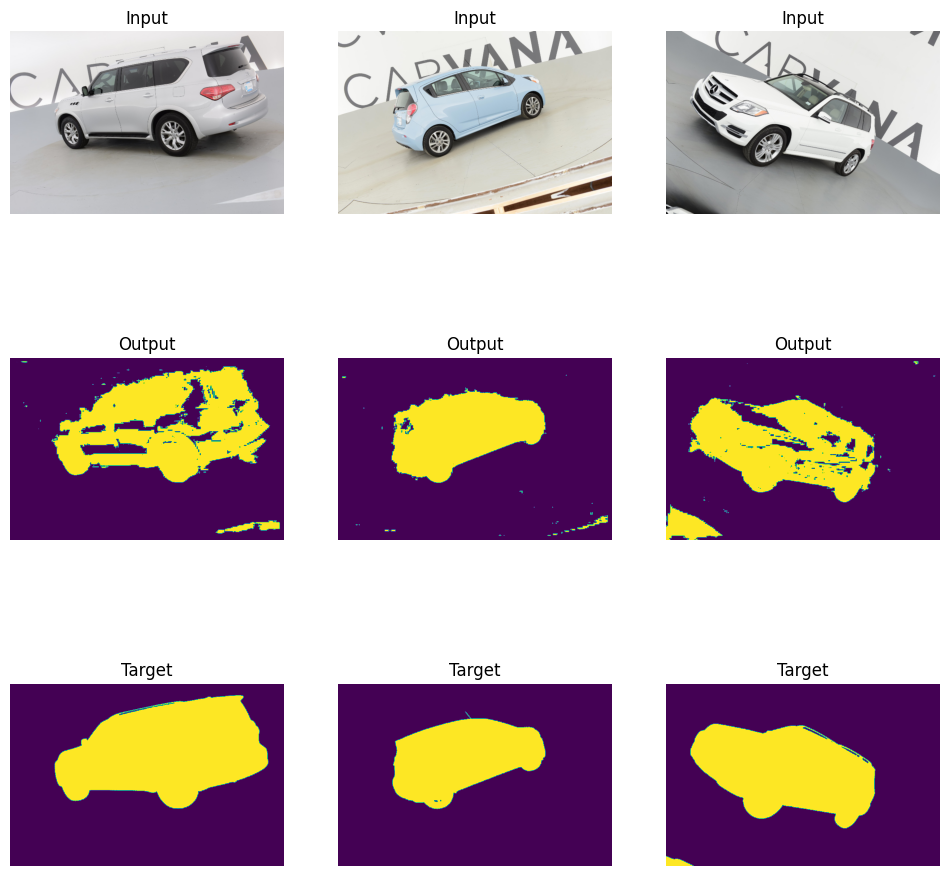

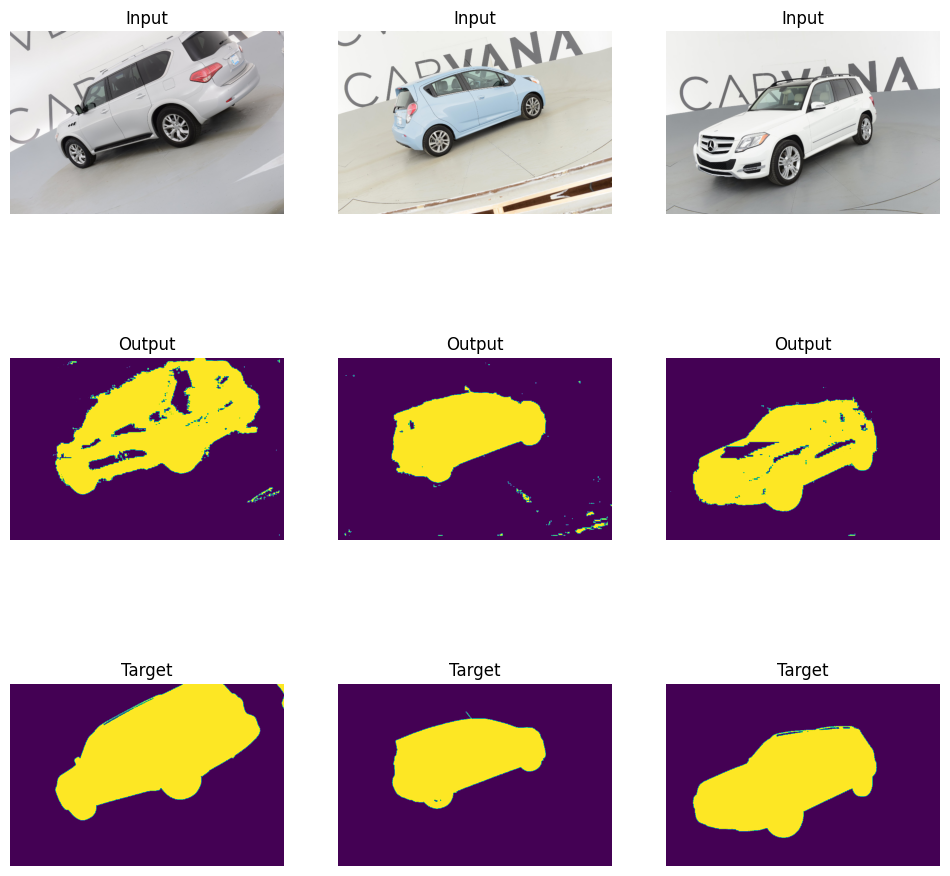

In [74]:
if 'unet' in locals():
    del unet

# the program will automatically select the appropriate device
# (GPU if available, CPU otherwise) for computation
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Creatung the model and move to the GPU for accelerated computations
unet = Unet(learning_rate=0.001)
unet = unet.to(device)

# Creating these loaders to terate over the training and validation datasets
# conveniently in batches during the training process
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
validation_loader = DataLoader(valid_data, batch_size=batch_size)

# Adam optimizer is created, which will be responsible for updating the
# parameters of the unet model based on the gradients computed during the
# training process
optimizer = torch.optim.Adam(unet.parameters(), lr=0.001)

# Start the timer
start_time = time.time()

# Initializing some paramters for later Analysis
train_losses = []
validation_losses = []
accuracies = []
ious = []
jaccards = []

# train the model iteratively for the specified number of epochs, each epoch
# represents a complete pass through the training dataset
for epoch in range(num_epochs):

    # call sets the model in training mode, enabling operations like dropout and
    # batch normalization to function as intended.
    unet.train()
    train_loss = 0.0

    # The tqdm function creates a progress bar to monitor the training progress.
    progress_bar = tqdm(enumerate(train_loader), total=len(train_loader))

    # Loop over the batches in the training data loader, obtaining the input
    # data (inputs) and target labels (targets) for each batch
    for batch_idx, (inputs, targets) in progress_bar:

        # input data and targer data do device
        inputs = inputs.to(device)
        targets = targets.to(device)

        # Clears the gradients of the optimizer to prevent accumulation
        # from previous batches
        optimizer.zero_grad()

        # obtain the predicted outputs
        outputs = unet(inputs)

        # Calculates loss
        loss = unet.loss(outputs, targets)

        # Performs backpropagation to compute gradients.
        loss.backward()

        # Updates the model parameters using the optimizer by calling
        optimizer.step()

        # Accumulates the batch loss
        train_loss += loss.item()

        # Updates Progress Bar
        progress_bar.set_description(f"Epoch {epoch+1}/{num_epochs}")
        progress_bar.set_postfix(loss=loss.item())

    # Compute the average training loss for the epoch
    train_loss /= len(train_loader)

    # Validation

    # sets the model in evaluation mode, disabling operations like dropout and
    # batch normalization
    unet.eval()
    validation_loss = 0.0
    accuracy = 0.0
    iou = 0.0
    jaccard = 0.0

    # disable gradient calculation and gradient tracking
    with torch.no_grad():
        for inputs, targets in validation_loader:

            # input data and targer data do device
            inputs = inputs.to(device)
            targets = targets.to(device)

            # obtain the predicted outputs
            outputs = unet(inputs)
            loss = unet.loss(outputs, targets)

            # adding the loss of each batch
            validation_loss += loss.item()

            # accuracy metric provides an indication of how well the model is
            # performing in terms of correctly classifying the validation samples
            outputs_binary = (outputs > 0.5).float()
            accuracy += (outputs_binary == targets).float().mean().item()

            # The IoU metric measures the extent of overlap and provides an
            # evaluation of how well the model is able to capture the target regions.
            intersection = (outputs_binary * targets).sum()
            union = (outputs_binary + targets).sum()
            iou += intersection / (union + 1e-8)

            #outputs_prob = torch.softmax(outputs, dim=1)
            #outputs_argmax = outputs_prob.argmax(dim=1).float()
            #jaccard += jaccard_score(outputs_binary.view(-1), outputs_argmax.view(-1), average='macro')


        # Averaging
        validation_loss /= len(validation_loader)
        accuracy /= len(validation_loader)
        iou /= len(validation_loader)
        #jaccard /= len(validation_loader)
        #jaccards.append(jaccard)

    print(f"Epoch {epoch+1}/{num_epochs} - Train Loss: {train_loss:.4f} - Validation Loss: {validation_loss:.4f}"
          f" - Accuracy: {accuracy:.4f} - IoU: {iou:.4f}")# - Jaccard: {jaccard:.4f}")

    # Append metrics to lists
    train_losses.append(train_loss)
    validation_losses.append(validation_loss)
    accuracies.append(accuracy)
    ious.append(iou)

    # Save predictions as images for a specific epoch
    if epoch == 0 or (epoch + 1) % 50 == 0:
        unet.eval()
        with torch.no_grad():
            example_inputs, example_targets = next(iter(validation_loader))
            example_inputs = example_inputs.to(device)
            example_targets = example_targets.to(device)

            example_outputs = unet(example_inputs)
            example_outputs = example_outputs.cpu().detach().numpy()
            example_targets = example_targets.cpu().detach().numpy()

            # Save example predictions as images
            fig, axes = plt.subplots(3, 3, figsize=(12, 12))
            for i, (ax_input, ax_output, ax_target) in enumerate(zip(axes[0], axes[1], axes[2])):
              ax_input.imshow(example_inputs[i].cpu().permute(1, 2, 0))
              ax_input.set_title("Input")
              ax_input.axis("off")

              ax_output.imshow(example_outputs[i][0])
              ax_output.set_title("Output")
              ax_output.axis("off")

              ax_target.imshow(example_targets[i][0])
              ax_target.set_title("Target")
              ax_target.axis("off")

          #plt.tight_layout()
          #plt.savefig(f"Colab Notebooks/Thesis/epochs/predictions_epoch_{epoch+1}.png")
          #plt.close(fig)


# Define the the Model name
model_file = f'unet_{num_epochs}epoch_{image_width}x{image_height}.pt'

# Create Model Folder
if not os.path.exists(f'{path_main}/models'):
  os.makedirs(f'{path_main}/models')

# Save Model
torch.save(unet, datapath.joinpath(f'{path_main}/models/{model_file}'))

# End the timer
end_time = time.time()

# Calculate the elapsed time
elapsed_time = end_time - start_time

print(f"Elapsed time: {elapsed_time} seconds")


### Analysis of Unet Training

In [75]:
# Move tensors to CPU memory
ious_cpu = [iou.cpu().numpy() for iou in ious]

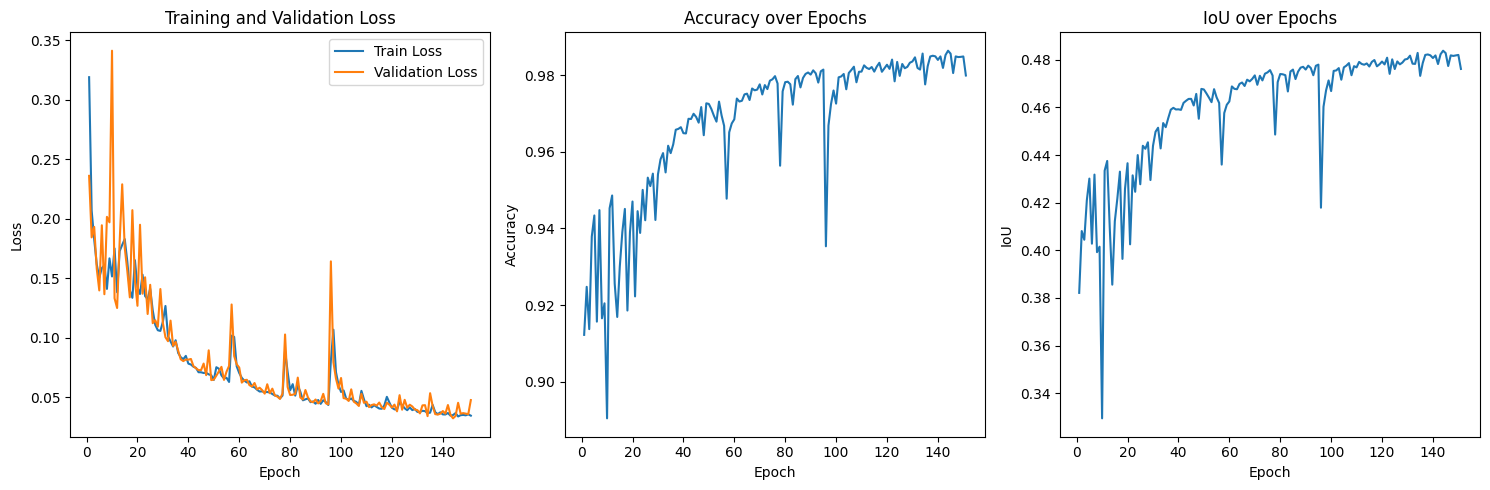

In [76]:
# Plotting
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Plot training and validation loss
axs[0].plot(range(1, num_epochs+1), train_losses, label='Train Loss')
axs[0].plot(range(1, num_epochs+1), validation_losses, label='Validation Loss')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Loss')
axs[0].set_title('Training and Validation Loss')
axs[0].legend()

# Plot accuracy
axs[1].plot(range(1, num_epochs+1), accuracies, label='Accuracy')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Accuracy')
axs[1].set_title('Accuracy over Epochs')

# Plot IoU
axs[2].plot(range(1, num_epochs+1), ious_cpu, label='IoU')
axs[2].set_xlabel('Epoch')
axs[2].set_ylabel('IoU')
axs[2].set_title('IoU over Epochs')

plt.tight_layout()
plt.show()

In [77]:
unet = torch.load(datapath.joinpath(f'{path_main}/models/unet_{num_epochs}epoch_{image_width}x{image_height}.pt'))

In [78]:
val_iter = iter(validation_loader)
test_batch, test_label = next(val_iter)

In [79]:
#pred = unet(test_batch)

# Move the model to the device
unet = unet.to(device)

# Move the test batch to the device
test_batch = test_batch.to(device)

# Make the prediction
pred = unet(test_batch)

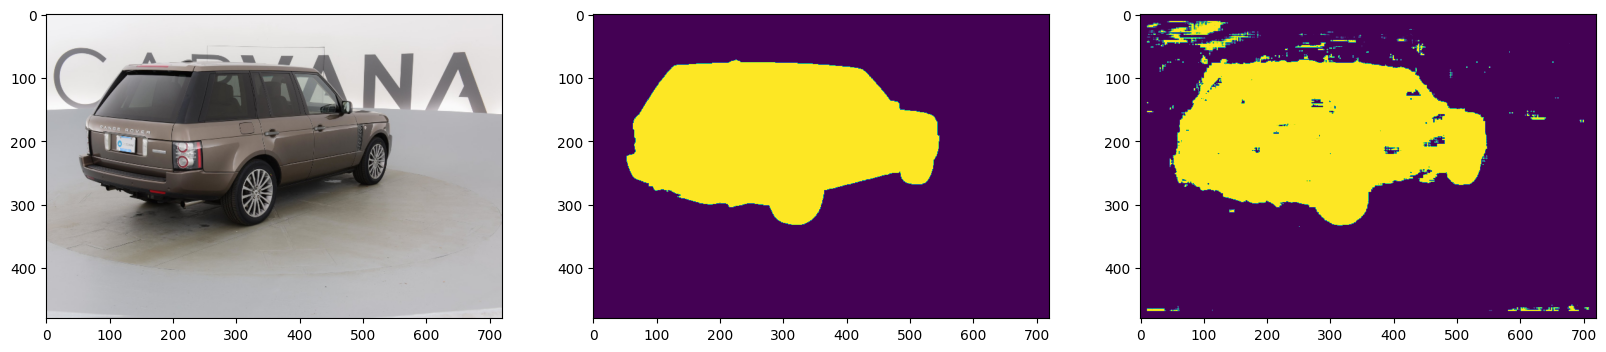

In [80]:
sample_nr = 10

pred_conv = pred[sample_nr]
pred_conv = pred_conv.detach().cpu().numpy()
pred_conv = pred_conv.reshape(pred_conv.shape[1:])

test_conv = test_batch[sample_nr]
test_conv = test_conv.permute(1, 2, 0).cpu().numpy()

label_conv = test_label[sample_nr]
label_conv = label_conv.detach().cpu().numpy()
label_conv = label_conv.reshape(label_conv.shape[1:])

fig, ax = plt.subplots(1, 3, figsize=(20, 5))
ax[0].imshow(test_conv)
ax[1].imshow(label_conv)
ax[2].imshow(pred_conv)

Text(0.5, 1.0, 'Histogram of Predicted Label')

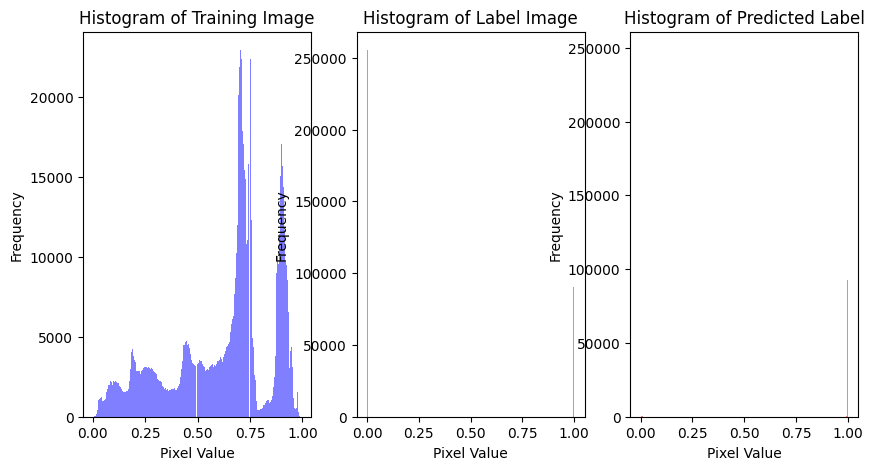

In [81]:
fig, ax = plt.subplots(1,3, figsize=(10, 5))

# Plot the histogram of the training image
ax[0].hist(test_conv.flatten(), bins=256, color='b', alpha=0.5)
ax[0].set_xlabel('Pixel Value')
ax[0].set_ylabel('Frequency')
ax[0].set_title('Histogram of Training Image')

# Plot the histogram of the label image
ax[1].hist(label_conv.flatten(), bins=256, color='r', alpha=0.5)
ax[1].set_xlabel('Pixel Value')
ax[1].set_ylabel('Frequency')
ax[1].set_title('Histogram of Label Image')

# Plot the histogram of the label image
ax[2].hist(pred_conv.flatten(), bins=256, color='r', alpha=0.5)
ax[2].set_xlabel('Pixel Value')
ax[2].set_ylabel('Frequency')
ax[2].set_title('Histogram of Predicted Label')

The [Leaderboard](https://www.kaggle.com/competitions/carvana-image-masking-challenge/leaderboard),
Winning
IoU = (Intersection area) / (Union area), same as Jaccard Value
is a 0.9978
The value achieved in this implementation is

In [82]:
print(ious_cpu[-1])

0.47617325


So we are rather far away from the 12'000 USD prize money.

## Image segmentation of detected object

Finally the workflow from detect object to the segmented image can be finally displayed!

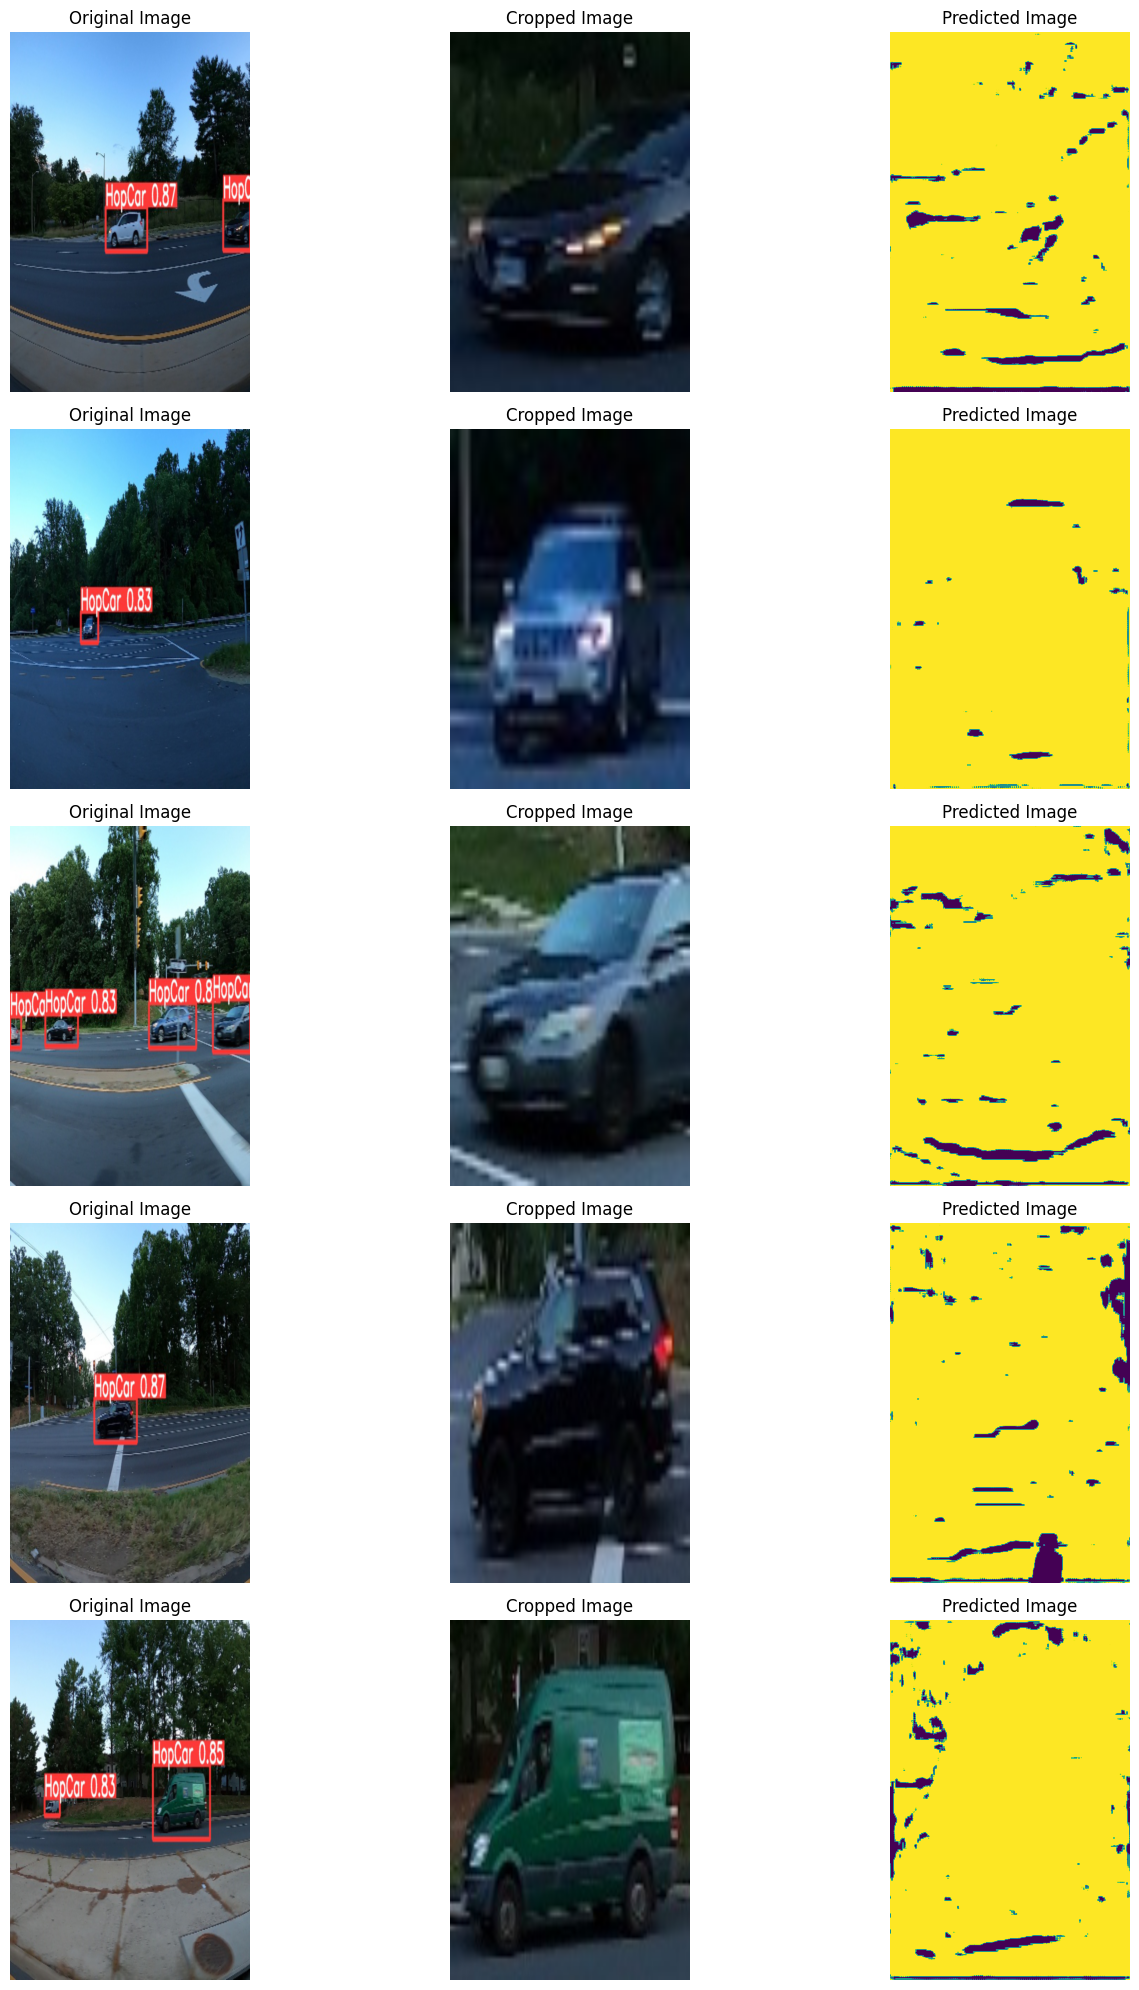

In [83]:
# Path to the directory containing the original images
image_folder = "yolov5_train/detect_test"

# Path to the directory containing the cropped images
output_folder = "cropped_images"

# Path to the UNet model
unet_model_path = f'{path_main}/models/unet_{num_epochs}epoch_{image_width}x{image_height}.pt'

# Randomly select 5 image pairs
image_files = os.listdir(image_folder)
random_images = random.sample(image_files, 5)

# Load the UNet model
unet = Unet(learning_rate=0.001)  # Replace with the appropriate UNet model class
unet = torch.load(unet_model_path)
unet = unet.to(device)
unet.eval()



# Create a figure to display the image pairs
fig, axs = plt.subplots(5, 3, figsize=(15, 20))  # Update to 3 columns

# Process each randomly selected image pair
for i, image_file in enumerate(random_images):
    image_path = os.path.join(image_folder, image_file)
    cropped_image_name = image_file[:-4] + "_0.jpg"
    cropped_image_path = os.path.join(output_folder, cropped_image_name)

    # Load the original image
    original_image = Image.open(image_path)
    original_image = Resize((desired_width, desired_height))(original_image)
    original_tensor = ToTensor()(original_image).unsqueeze(0).to(device)

    # Load and display the cropped image if it exists
    if os.path.exists(cropped_image_path):
        cropped_image = Image.open(cropped_image_path)
        cropped_image = Resize((desired_width, desired_height))(cropped_image)
        cropped_tensor = ToTensor()(cropped_image).unsqueeze(0).to(device)

        # Make the UNet prediction on the cropped image
        with torch.no_grad():
            cropped_pred = unet(cropped_tensor)

        # Convert the predicted tensor to an image
        cropped_pred_image = ToPILImage()(cropped_pred.squeeze(0).cpu())

        # Display the original image, cropped image, and predicted image
        axs[i, 0].imshow(original_image)
        axs[i, 0].axis("off")
        axs[i, 0].set_title("Original Image")

        axs[i, 1].imshow(cropped_image)
        axs[i, 1].axis("off")
        axs[i, 1].set_title("Cropped Image")

        axs[i, 2].imshow(cropped_pred_image)
        axs[i, 2].axis("off")
        axs[i, 2].set_title("Predicted Image")
    else:
        axs[i, 0].axis("off")
        axs[i, 0].set_title("Original Image (Not Found)")
        axs[i, 1].axis("off")
        axs[i, 1].set_title("Cropped Image (Not Found)")

# Remove empty subplots if the number of random images is less than 3
for j in range(len(random_images), 3):
    axs[j, 0].axis("off")
    axs[j, 1].axis("off")
    axs[j, 2].axis("off")

# Adjust the spacing between subplots
plt.tight_layout()

# Show the figure
plt.show()

## Summary



*   This Notebook show a possible implementation of an workflow custom Object detection and segmentation
  * There are a lot of alternatives of this implementation avaiable on Github, Kaggle, etc. , but the goal was not only to create an accurate segmentation output. An implementation for real world application e.g. at a foundary to count and segement castings can now be better understood and pot. optimized

*  To be improved
  * The Unet part has to debugged/optimized in order to have higher IoU
  * Upcscaling of the cropped image resp. higher resolution of the original image have to be applied





